## Gramener Case Study - EDA

### Business Objectives:-
    
        This company is the largest online loan marketplace, facilitating personal loans, business loans, 
        and financing of medical procedures. Borrowers can easily access lower interest rate loans 
        through a fast online interface.

        The company wants to understand the driving factors (or driver variables) behind loan default, 
        i.e. the variables which are strong indicators of default.  
        The company can utilise this knowledge for its portfolio and risk assessment. 

### Importing libraries:-

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import pandas_profiling   #need to install using anaconda prompt (pip install pandas_profiling)
%pylab inline
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True
plt.gray()

Populating the interactive namespace from numpy and matplotlib


In [3]:
import statsmodels.formula.api as sm
import scipy.stats as stat
import scipy.stats as stats
from matplotlib.backends.backend_pdf import PdfPages
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
%matplotlib inline

### Data Sourcing:-

    This is a private dataset consumer finance company which specialises in lending various types of loans 
    to urban customers.
    
#### Features of the dataset at a glance:- 
    A. There are 111 columns and 0 to 39716 entries in each columns.
    B. There of 74 columns of float64 type , 13 columns of int64 type and 24 columns of object type. 

In [4]:
loan  = pd.read_csv('loan.csv')

C:\Users\lenovo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [6]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


### Data Cleaning, Prfiling and Treatment:-

    Dropping columns will mnore than 25000 NULL values 

In [9]:
#Creating a dataset out of the SUM of NULLs
no_of_null = pd.DataFrame(loan.isnull().sum(axis=0)).reset_index()
no_of_null.rename(columns={ no_of_null.columns[0]: "Attributes",no_of_null.columns[1]: "NoOfNulls"},inplace=True)

In [10]:
#Taking columns where > 25000 rows are NA:-
no_of_null[no_of_null['NoOfNulls'] > 25000]

,Attributes,NoOfNulls
28,mths_since_last_delinq,25682
29,mths_since_last_record,36931
47,next_pymnt_d,38577
50,mths_since_last_major_derog,39717
53,annual_inc_joint,39717
54,dti_joint,39717
55,verification_status_joint,39717
57,tot_coll_amt,39717
58,tot_cur_bal,39717
59,open_acc_6m,39717


In [11]:
#There ar 57 columns having more than 25000 rows as NAs, which can be dropped - since they do not contribute 
#much to our analysis.

In [12]:
loan.drop(['mths_since_last_delinq','mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit'],axis=1,inplace=True)

In [13]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null object
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37258 non-null object
emp_length                    38642 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_pl

#### Profiling our Customers' Loan Data:-

    Based on data profiling; namely unique values, high cardinality, multi-correlation and >90% Zeros
    26 columns can be dropped

##### Observation 1 :-
    9 Columns have "Single values" - bear no significance to our data -
   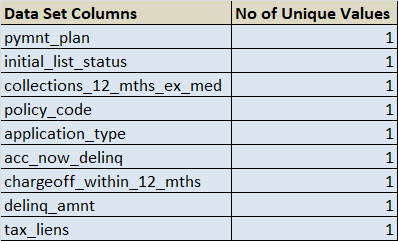

#### Observation 2 :-
    6 columns have "High cardinality" and help us gain any insight -
   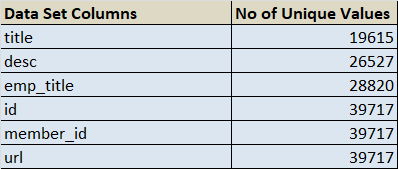

In [14]:
# Finding out the unique values for each columns:-
loan.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26527
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

In [15]:
#Dropping columns based on observations 1 and 2
loan.drop(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt','tax_liens', 'title', 'desc', 'emp_title', 'id', 'member_id', 'url'],axis=1,inplace=True)

#### Observation 3:-
    Loan Amount, funded_amnt, funded_amnt_inv and installment are highly correlated (ρ >0.9) with each other
    And total_pymnt, total_pymnt_inv and total_rec_prncp are highly correlated (ρ >0.9) with each other.
        - we can keep any one from each pair, to avoid multi-correlation   

   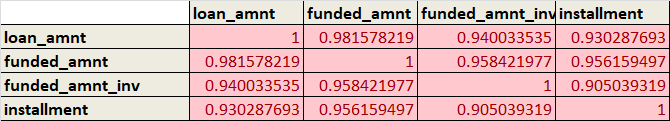


   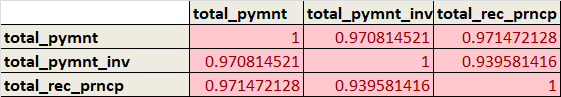

In [16]:
#Finding out the correlation among columns
loan_corr = loan.corr()
loan_corr.to_csv('loan_corr.csv')

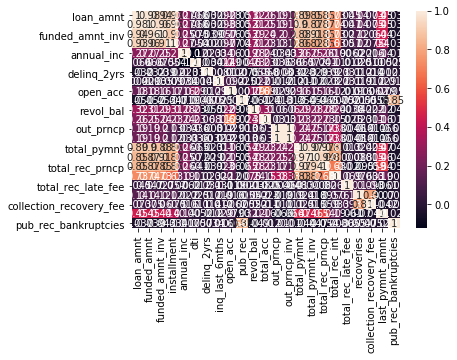

In [17]:
sns.heatmap(loan.corr(),annot=True)

    Dropping columns based on observation 3 -
    
        Keeping 'Loan Amount' and dropping - funded_amnt, funded_amnt_inv and installment 
        Keeping 'total_pymnt' and dropping - total_pymnt_inv and total_rec_prncp

In [18]:
loan.drop(['funded_amnt_inv', 'funded_amnt', 'installment', 'total_pymnt_inv', 'total_rec_prncp'],axis=1,inplace=True)

#### Observation 4:-
    > 90% Zeros in column -
    
    'pub_rec' has 37601 / 94.7% zeros Zeros
    'collection_recovery_fee' has 35935 / 90.5% zeros Zeros
    'delinq_2yrs' has 35405 / 89.1% zeros Zeros
    'out_prncp' has 38577 / 97.1% zeros Zeros
    'pub_rec_bankruptcies' has 37339 / 94.0% zeros Zeros
    'recoveries' has 35499 / 89.4% zeros Zeros
    'total_rec_late_fee' has 37671 / 94.8% zeros Zeros  
    
   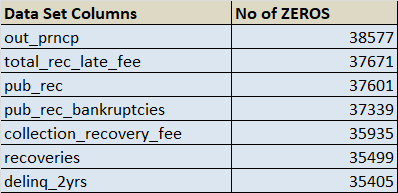
    

In [19]:
#Finding the number of zeros in each columns
(loan == 0).astype(int).sum(axis=0)

loan_amnt                      0
term                           0
int_rate                       0
grade                          0
sub_grade                      0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
purpose                        0
zip_code                       0
addr_state                     0
dti                          183
delinq_2yrs                35405
earliest_cr_line               0
inq_last_6mths             19300
open_acc                       0
pub_rec                    37601
revol_bal                    994
revol_util                     0
total_acc                      0
out_prncp                  38577
out_prncp_inv              38577
total_pymnt                   16
total_rec_int                 71
total_rec_late_fee         37671
recoveries                 35499
collection_recovery_fee    35935
last_pymnt

In [20]:
#Based on observation 4 dropping follwing columns -
loan.drop(['pub_rec', 'collection_recovery_fee' , 'delinq_2yrs', 'out_prncp', 'pub_rec_bankruptcies', 'recoveries', 'total_rec_late_fee'],axis=1,inplace=True)

##### Rechecking Columns with NULL Values:-
    
    'emp_length' - It is Justified to have NULL values, a person can be unemployed.
    'last_pymnt_d', 'last_credit_pull_d'
        - It is Justified to have NULL values, a person may never paid or credit has never been pulled
    

In [21]:
no_of_null = pd.DataFrame(loan.isnull().sum(axis=0)).reset_index()
no_of_null.rename(columns={ no_of_null.columns[0]: "Attributes",no_of_null.columns[1]: "NoOfNulls"},inplace=True)

In [22]:
no_of_null[no_of_null['NoOfNulls'] > 0]

,Attributes,NoOfNulls
5,emp_length,1075
19,revol_util,50
24,last_pymnt_d,71
26,last_credit_pull_d,2


In [23]:
#Replacing NA values as "Not Availible" for empl length
loan['emp_length'] = loan['emp_length'].replace(np.nan, 'Not Availible', regex=True)

#Replacing NA values as "SPACES" for last_pymnt_d
loan['last_pymnt_d'] = loan['last_pymnt_d'].replace(np.nan, '', regex=True)

#Replacing NA values as "SPACES" for last_credit_pull_d
loan['last_credit_pull_d'] = loan['last_credit_pull_d'].replace(np.nan, '', regex=True)

    NUll value treatment for 'revol_util':-
    
        Revolving utilization, also known as your “debt-to-limit ratio” or “credit utilization,” 
        measures the amount of your revolving credit limits that you are currently using.
        
        There are two unique values for 'revol_bal' when 'revol_util' is NULL
        Value1: 0
        Value2: 49238
        
        By defination of revol_utilization, so we can assume when 'revol_bal' is zero 'revol_util' is also ZERO.
        For 'revol_bal' 49238, we can replace that with 93.50 - since we find the same utilization for another 49238

In [24]:
#Making the 'revol_util' a numeric value
loan['revol_util'] = loan[['revol_util']].replace('%', '', regex=True)
loan['revol_util'] = loan['revol_util'].astype('float64')

In [25]:
#There are two unique values for 'revol_bal' when revol_util is null
loan[loan['revol_util'].isnull()].nunique()

loan_amnt              32
term                    2
int_rate               39
grade                   6
sub_grade              19
emp_length             11
home_ownership          4
annual_inc             38
verification_status     3
issue_d                28
loan_status             2
purpose                12
zip_code               45
addr_state             26
dti                    43
earliest_cr_line       40
inq_last_6mths          4
open_acc               11
revol_bal               2
revol_util              0
total_acc              18
out_prncp_inv           1
total_pymnt            50
total_rec_int          47
last_pymnt_d           36
last_pymnt_amnt        47
last_credit_pull_d     36
dtype: int64

    For 'revol_bal' as 49238, we can replace revol_util as 93.50; since we have unique value in another column

In [26]:
loan.loc[loan['revol_bal'] == 49238]

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,...,open_acc,revol_bal,revol_util,total_acc,out_prncp_inv,total_pymnt,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d
5820,17625,60 months,23.91%,G,G4,2 years,MORTGAGE,400000.0,Verified,Oct-11,...,27,49238,93.5,60,0.0,20896.160000,10541.99,Feb-15,506.12,Aug-15
37540,5000,36 months,16.95%,E,E5,5 years,MORTGAGE,110000.0,Verified,Feb-09,...,5,49238,NaN,22,0.0,6412.768458,1412.77,Mar-12,182.11,Feb-12


In [27]:
loan.loc[37540, 'revol_util'] = 93.5

    For 'revol_bal' as 0, we can replace revol_util as 0 as-well, since that is our median when revol_bal is zero

In [28]:
loan.loc[loan['revol_bal'] == 0].median()

loan_amnt           7000.000000
annual_inc         50000.000000
dti                    8.415000
inq_last_6mths         0.000000
open_acc               5.000000
revol_bal              0.000000
revol_util             0.000000
total_acc             15.000000
out_prncp_inv          0.000000
total_pymnt         7183.380048
total_rec_int        886.340000
last_pymnt_amnt      427.775000
dtype: float64

In [29]:
loan['revol_util'] = loan['revol_util'].replace(np.nan, 0.0, regex=True)

In [30]:
## Glancing the Columns of dataframe 

In [31]:
loan.isnull().any()

loan_amnt              False
term                   False
int_rate               False
grade                  False
sub_grade              False
emp_length             False
home_ownership         False
annual_inc             False
verification_status    False
issue_d                False
loan_status            False
purpose                False
zip_code               False
addr_state             False
dti                    False
earliest_cr_line       False
inq_last_6mths         False
open_acc               False
revol_bal              False
revol_util             False
total_acc              False
out_prncp_inv          False
total_pymnt            False
total_rec_int          False
last_pymnt_d           False
last_pymnt_amnt        False
last_credit_pull_d     False
dtype: bool

#### Data Treatments:-

In [32]:
#term column treatment - making it numeric
loan['term'] = loan['term'].replace('months', '', regex=True)
loan['term'] = loan['term'].astype('int64')

In [33]:
#int_rate column treatment - making it numeric
loan['int_rate'] = loan['int_rate'].replace('%', '', regex=True)
loan['int_rate'] = loan['int_rate'].astype('float64')

#### Divinding the main dataframe into 2 parts -
    loan_work - 'Fully Paid', 'Charged Off'
    loan_current - 'Current'

    We will be using 'loan_work' for the rest of our Exploratory Data Analysis.

In [34]:
loan['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [35]:
loan_work = loan[(loan.loan_status == 'Fully Paid') | (loan.loan_status == 'Charged Off')]

In [36]:
loan_current = loan[(loan.loan_status == 'Current')]

### Analysis and Observations:-

In [37]:
loan_work.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,...,open_acc,revol_bal,revol_util,total_acc,out_prncp_inv,total_pymnt,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d
0,5000,36,10.65,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,...,3,13648,83.7,9,0.0,5863.155187,863.16,Jan-15,171.62,May-16
1,2500,60,15.27,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,...,3,1687,9.4,4,0.0,1008.710000,435.17,Apr-13,119.66,Sep-13
2,2400,36,15.96,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,...,2,2956,98.5,10,0.0,3005.666844,605.67,Jun-14,649.91,May-16
3,10000,36,13.49,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,...,10,5598,21.0,37,0.0,12231.890000,2214.92,Jan-15,357.48,Apr-16
5,5000,36,7.90,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,...,9,7963,28.3,12,0.0,5632.210000,632.21,Jan-15,161.03,Jan-16


In [38]:
loan_work.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 27 columns):
loan_amnt              38577 non-null int64
term                   38577 non-null int64
int_rate               38577 non-null float64
grade                  38577 non-null object
sub_grade              38577 non-null object
emp_length             38577 non-null object
home_ownership         38577 non-null object
annual_inc             38577 non-null float64
verification_status    38577 non-null object
issue_d                38577 non-null object
loan_status            38577 non-null object
purpose                38577 non-null object
zip_code               38577 non-null object
addr_state             38577 non-null object
dti                    38577 non-null float64
earliest_cr_line       38577 non-null object
inq_last_6mths         38577 non-null int64
open_acc               38577 non-null int64
revol_bal              38577 non-null int64
revol_util             38577 non-null 

In [39]:
loan_work.isnull().any()

loan_amnt              False
term                   False
int_rate               False
grade                  False
sub_grade              False
emp_length             False
home_ownership         False
annual_inc             False
verification_status    False
issue_d                False
loan_status            False
purpose                False
zip_code               False
addr_state             False
dti                    False
earliest_cr_line       False
inq_last_6mths         False
open_acc               False
revol_bal              False
revol_util             False
total_acc              False
out_prncp_inv          False
total_pymnt            False
total_rec_int          False
last_pymnt_d           False
last_pymnt_amnt        False
last_credit_pull_d     False
dtype: bool

    Derived Variables:-
    
    Instead of Using 'Fully Paid' and 'Charged Off'; Lets use 0 and 1
    0 - 'Fully Paid'
    1-  'Charged Off'

In [40]:
def loanstatus(loan_work):
    if ((loan_work.loan_status == 'Fully Paid')):
        return 0
    else:
        return 1

loan_work['loan_status_cat'] = loan_work.apply(loanstatus, axis=1)

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [41]:
loan_work.drop(['loan_status'],axis=1, inplace = True)

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


#### Creating seperate List for categorical and numeric variables

In [42]:
cat_list = []
num_list = []

for variable in loan_work.columns:
    if loan_work[variable].dtype.name in ['object']:
        cat_list.append(variable)
    else:
        num_list.append(variable)

In [43]:
loan_work['out_prncp_inv'].tail()

39712    0.0
39713    0.0
39714    0.0
39715    0.0
39716    0.0
Name: out_prncp_inv, dtype: float64

### Univariate and Segmented Univariate Analysis

Univariate Analysis for Numerical Variables

##### Observations:-
    
    Columns need outlier treatment - 
    'loan_amnt', 'annual_inc', 'open_acc', 'revol_bal', 'total_acc', 'total_pymnt', 'total_rec_int' 
    & 'last_pymnt_amnt'
    
    Column - 'out_prncp_inv' can be dropped since for "Charged off and Fully Paid" It is 0 for all
   

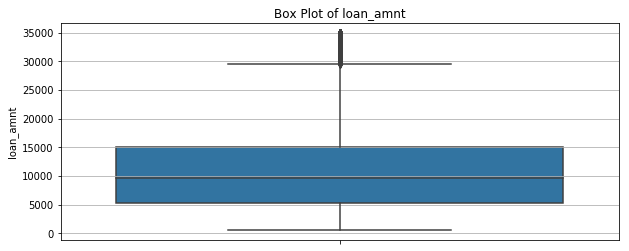

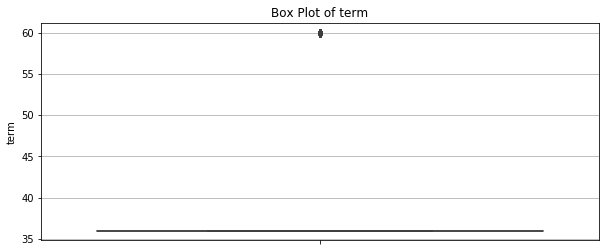

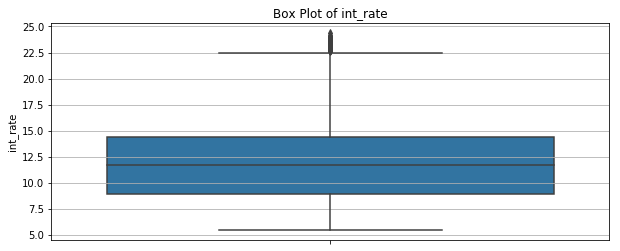

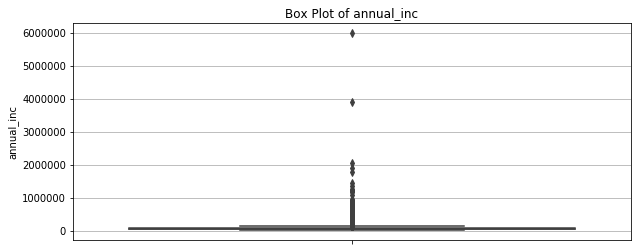

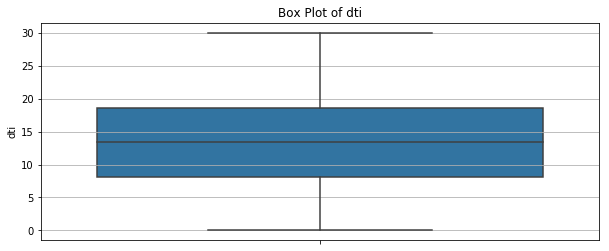

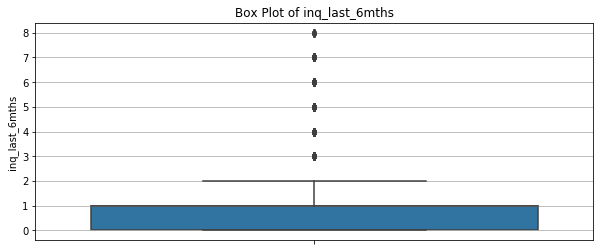

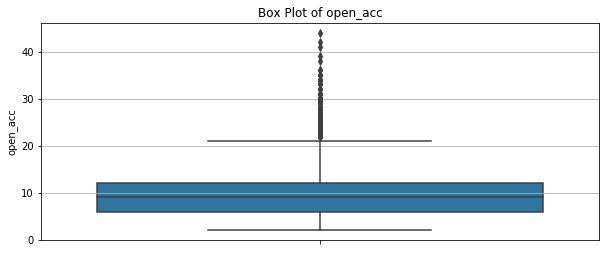

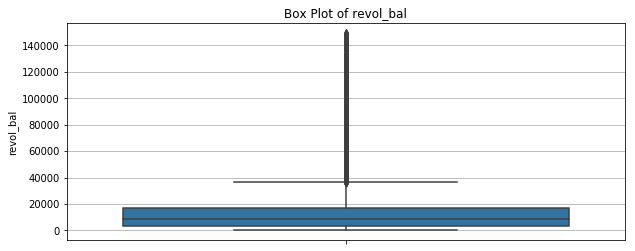

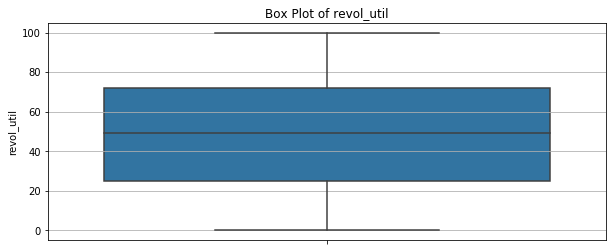

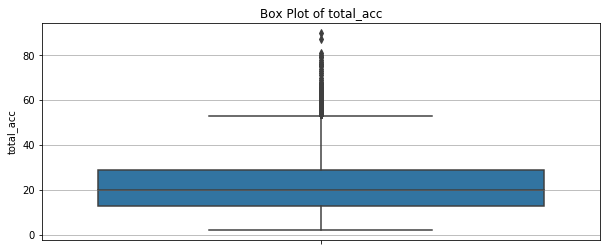

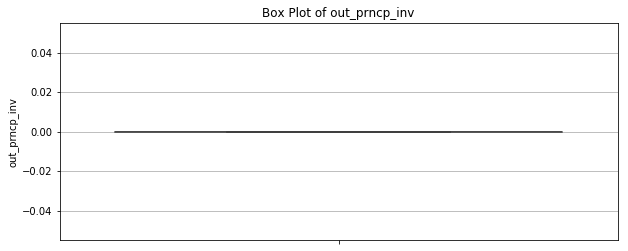

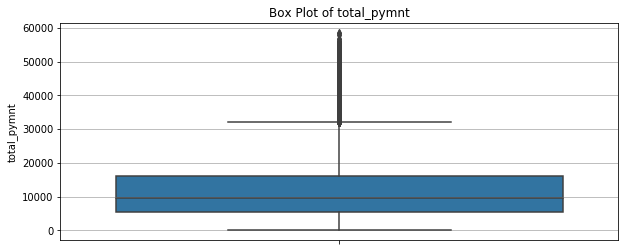

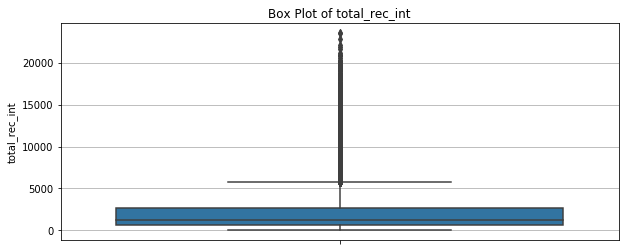

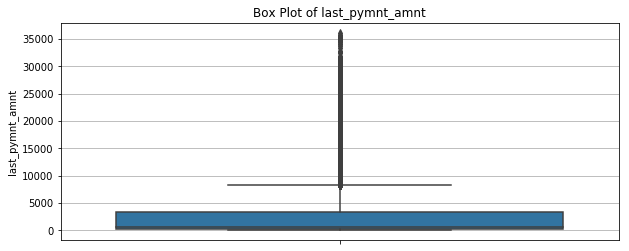

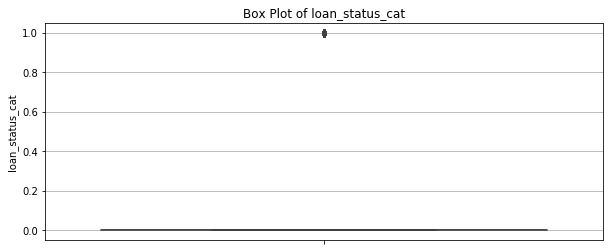

In [44]:
bp = PdfPages('BoxPlots with Univariate Numeric.pdf')

for num_variable in num_list:
    fig,axes = plt.subplots(figsize=(10,4))
    sns.boxplot(y=num_variable, data = loan_work)
    plt.title(str('Box Plot of ') + str(num_variable))
    bp.savefig(fig)
bp.close()

    Decile Analysis:-

In [45]:
loan_work[num_list].describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95]).T

,count,mean,std,min,10%,20%,30%,40%,50%,60%,70%,80%,90%,95%,max
loan_amnt,38577.0,11047.025430,7348.441646,500.00,3090.000000,5000.000000,6000.000000,7750.000000,9600.000000,11200.000000,14000.000000,16000.000000,21600.00000,25000.00000,3.500000e+04
term,38577.0,41.898437,10.333136,36.00,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,60.000000,60.00000,60.00000,6.000000e+01
int_rate,38577.0,11.932219,3.691327,5.42,7.140000,7.900000,9.990000,10.990000,11.710000,12.840000,13.800000,15.210000,16.82000,18.31200,2.440000e+01
annual_inc,38577.0,68777.973681,64218.681802,4000.00,30000.000000,37196.160000,44500.000000,50004.000000,58868.000000,65004.000000,75000.000000,90000.000000,115000.00000,140004.00000,6.000000e+06
dti,38577.0,13.272727,6.673044,0.00,4.060000,6.910000,9.240000,11.350000,13.370000,15.310000,17.430000,19.710000,22.29000,23.80000,2.999000e+01
inq_last_6mths,38577.0,0.871737,1.071546,0.00,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,2.00000,3.00000,8.000000e+00
open_acc,38577.0,9.275423,4.401588,2.00,4.000000,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,13.000000,15.00000,17.00000,4.400000e+01
revol_bal,38577.0,13289.489826,15866.492241,0.00,1099.000000,2787.000000,4569.000000,6528.000000,8762.000000,11391.600000,14729.400000,19617.000000,28972.00000,41356.20000,1.495880e+05
revol_util,38577.0,48.642076,28.400299,0.00,8.300000,19.800000,30.200000,39.800000,49.000000,58.100000,67.500000,77.200000,87.80000,93.50000,9.990000e+01
total_acc,38577.0,22.052648,11.425861,2.00,9.000000,12.000000,15.000000,18.000000,20.000000,23.000000,27.000000,31.000000,38.00000,43.00000,9.000000e+01


    Outlier Treatment of Numeric variables and rounding the values to 2 Decimal:-

In [46]:
outlierlist = ['loan_amnt', 'annual_inc', 'open_acc', 'revol_bal', 'total_acc', 'total_pymnt', 'total_rec_int', 'last_pymnt_amnt']

In [47]:
#Handling Outliers - Defination
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.95))
    x = x.clip_lower(x.quantile(0.01))
    return x

In [48]:
loan_work[outlierlist]=loan_work[outlierlist].apply(lambda x: outlier_capping(x))

C:\Users\lenovo\Anaconda3\lib\site-packages\pandas\core\frame.py:2540: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [49]:
loan_work[['total_pymnt', 'total_rec_int', 'last_pymnt_amnt']]= loan_work[['total_pymnt', 'total_rec_int', 'last_pymnt_amnt']].round(2)

C:\Users\lenovo\Anaconda3\lib\site-packages\pandas\core\frame.py:2540: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [50]:
loan_work.drop('out_prncp_inv',axis=1,inplace= True)

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Univariate Analysis for Categorical Variables

#### Observations:- 

    1> Loan Grade 'F' and 'G' of really LOW intake.
	2> 10+ years experienced employees are taking more loans.
	3> Home ownerships are either - RENT or MORTGARE.
	4> Major Purpose for Loan is - 'debt consolidation'.
	5> State taking MAX loans is "CA - California".

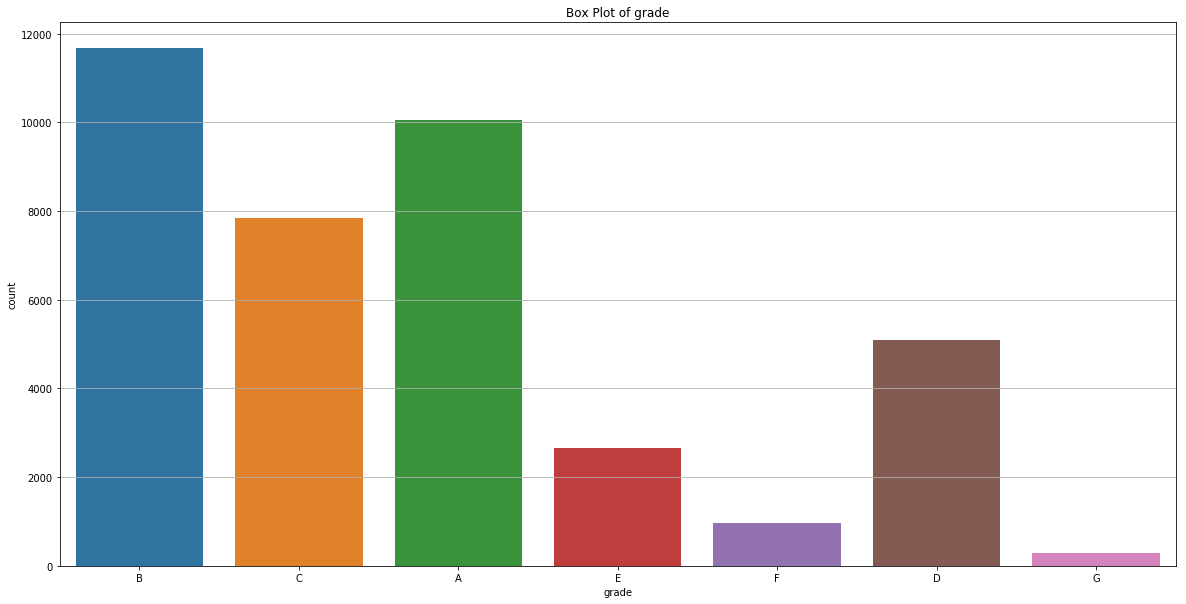

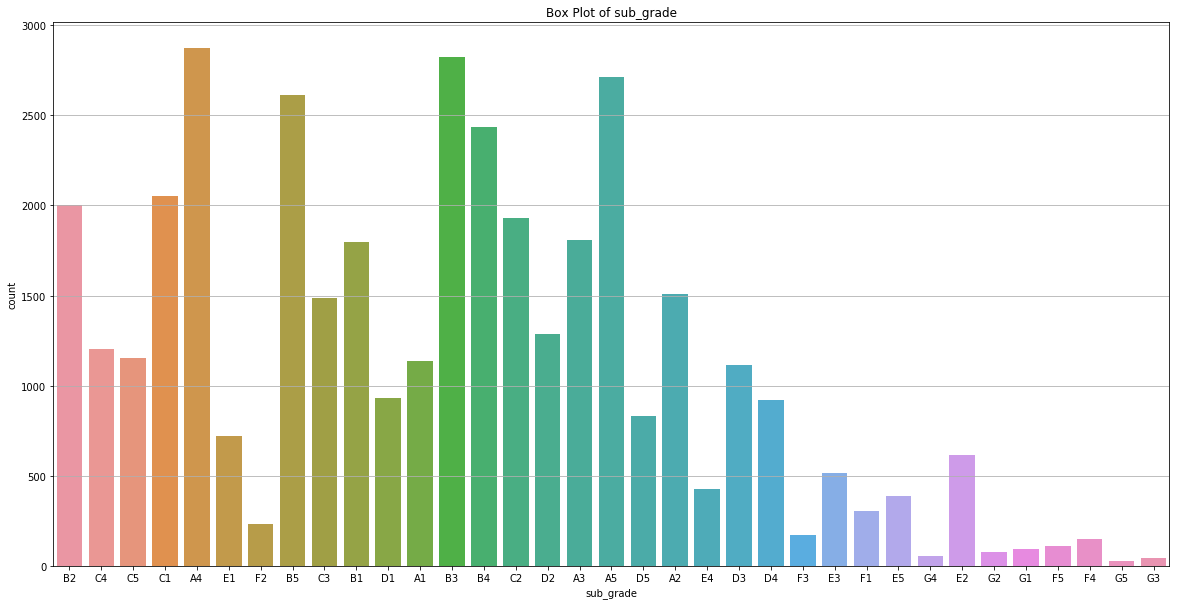

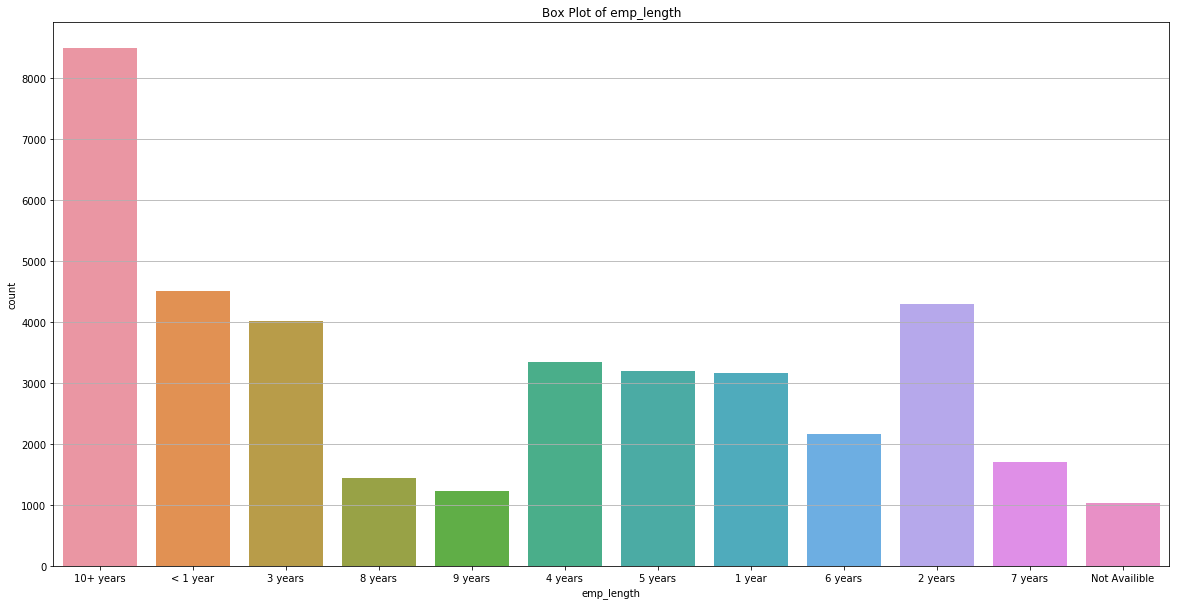

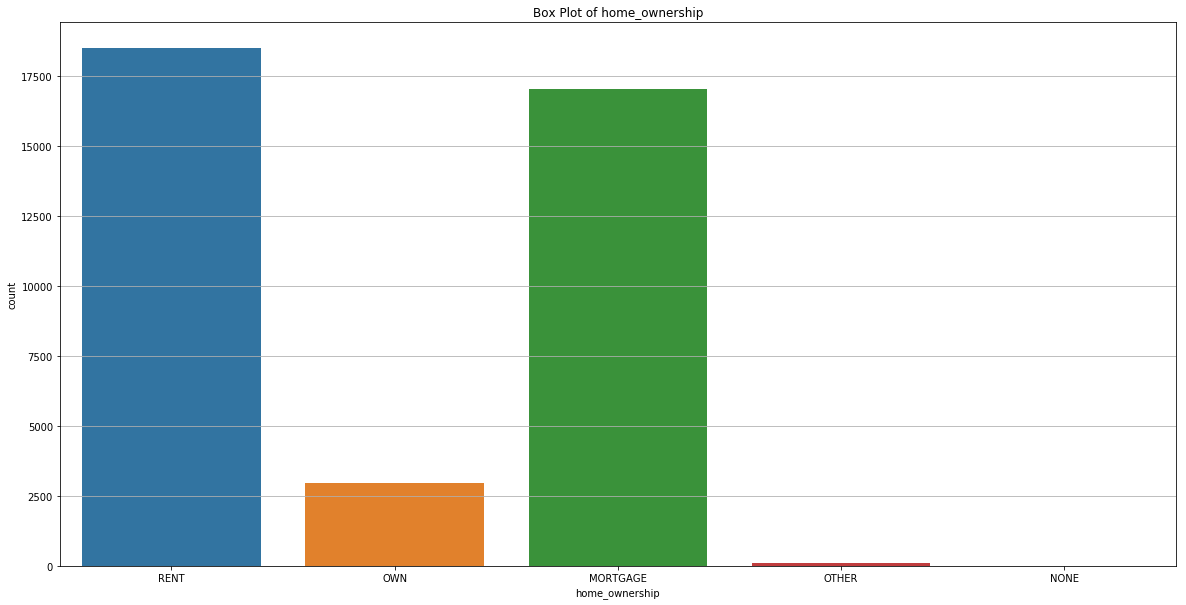

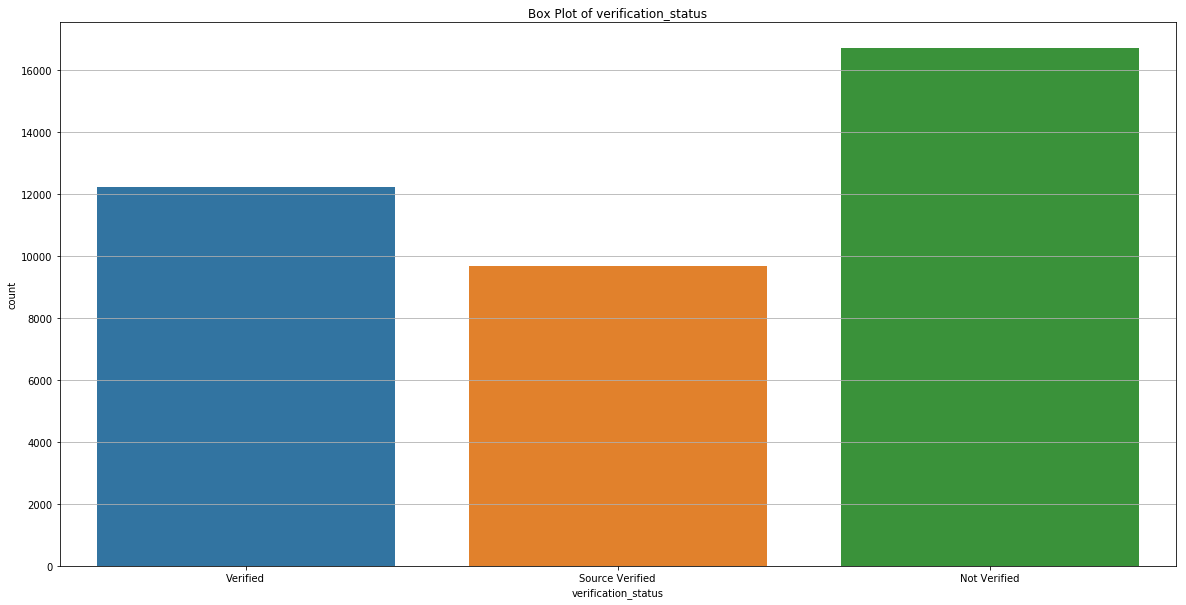

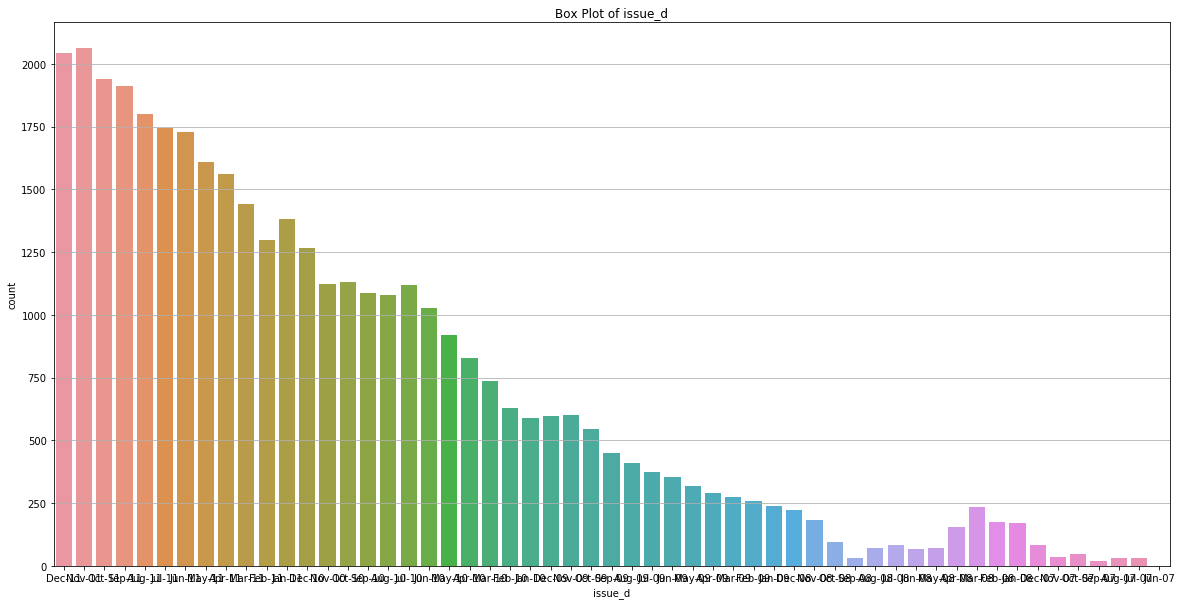

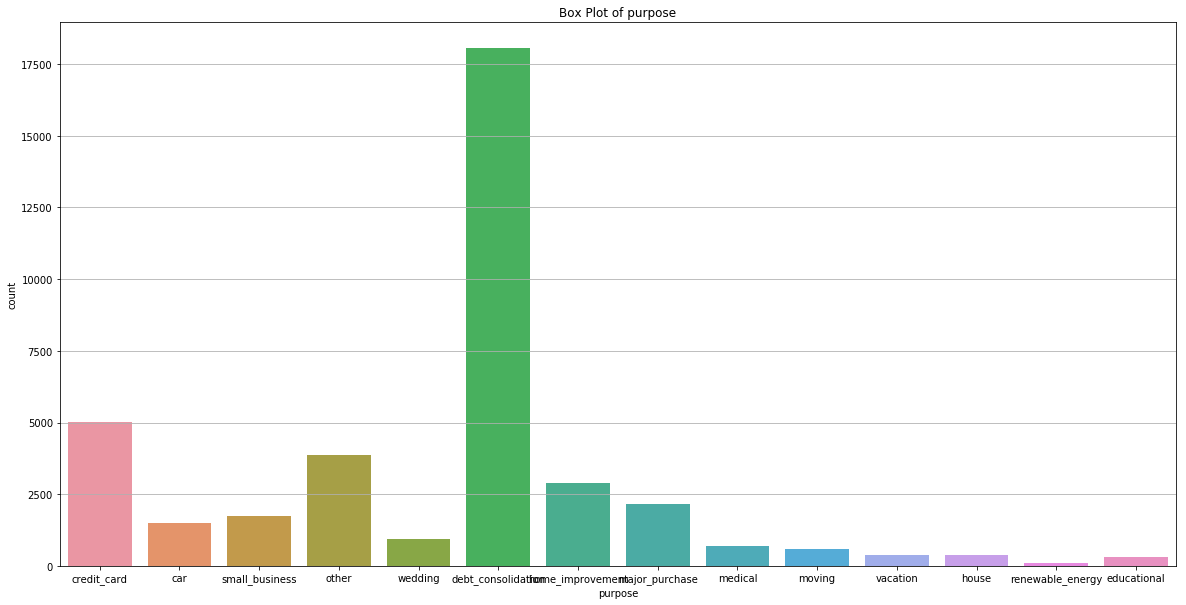

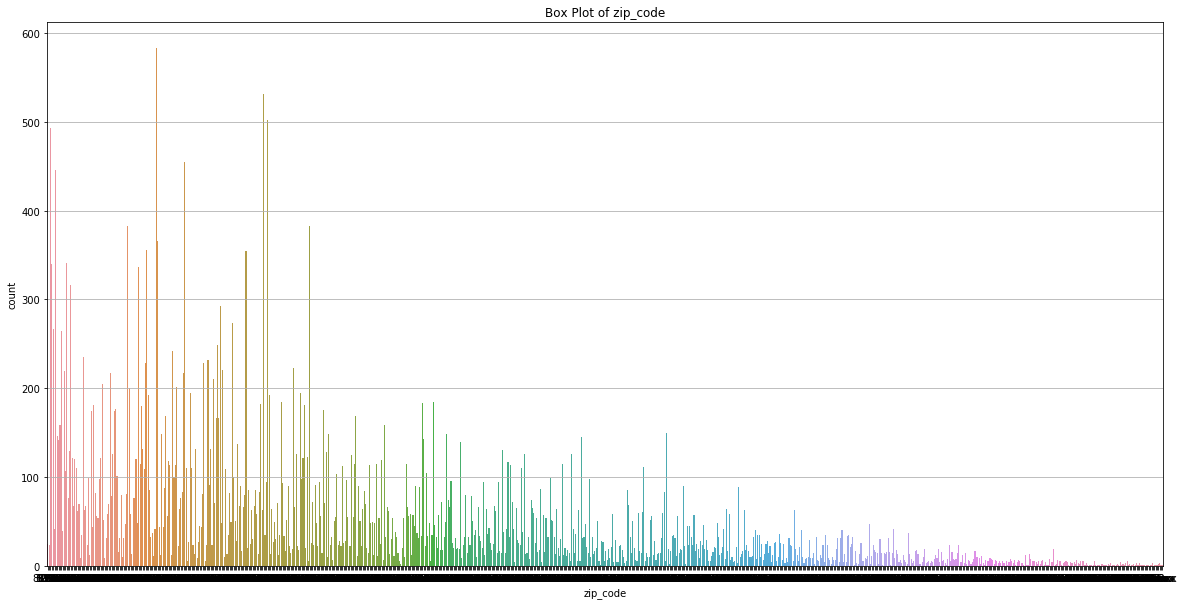

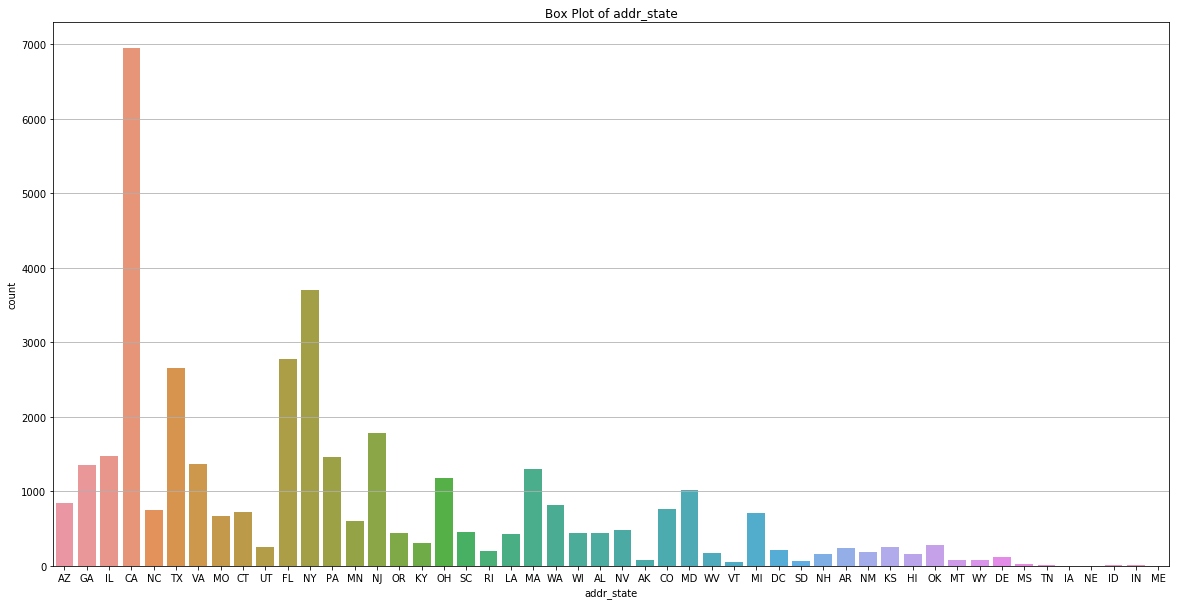

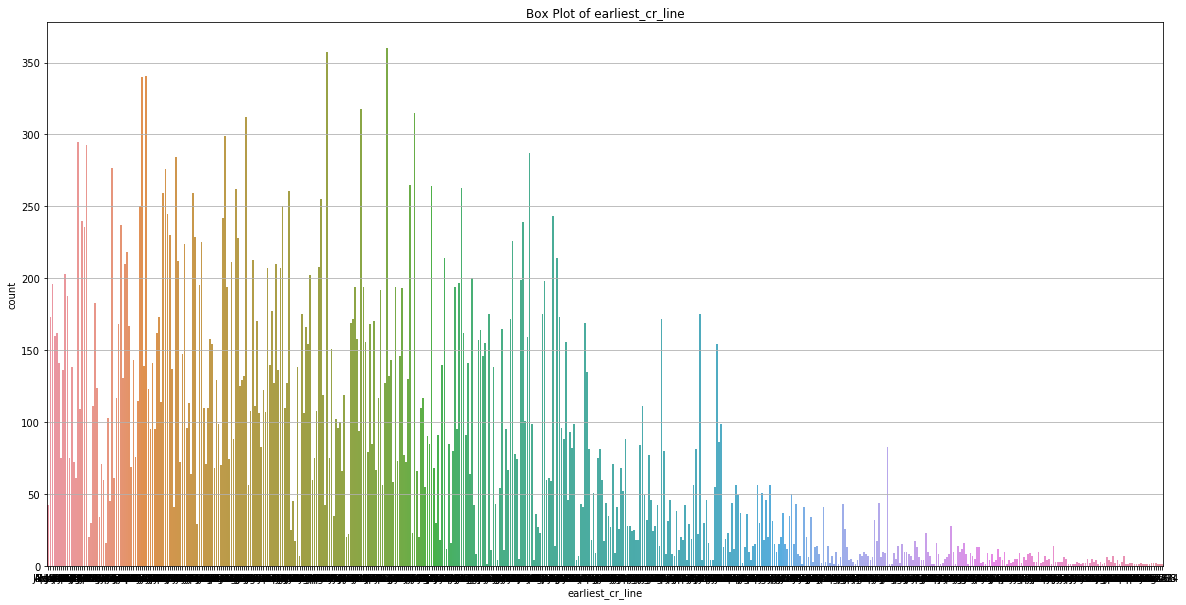

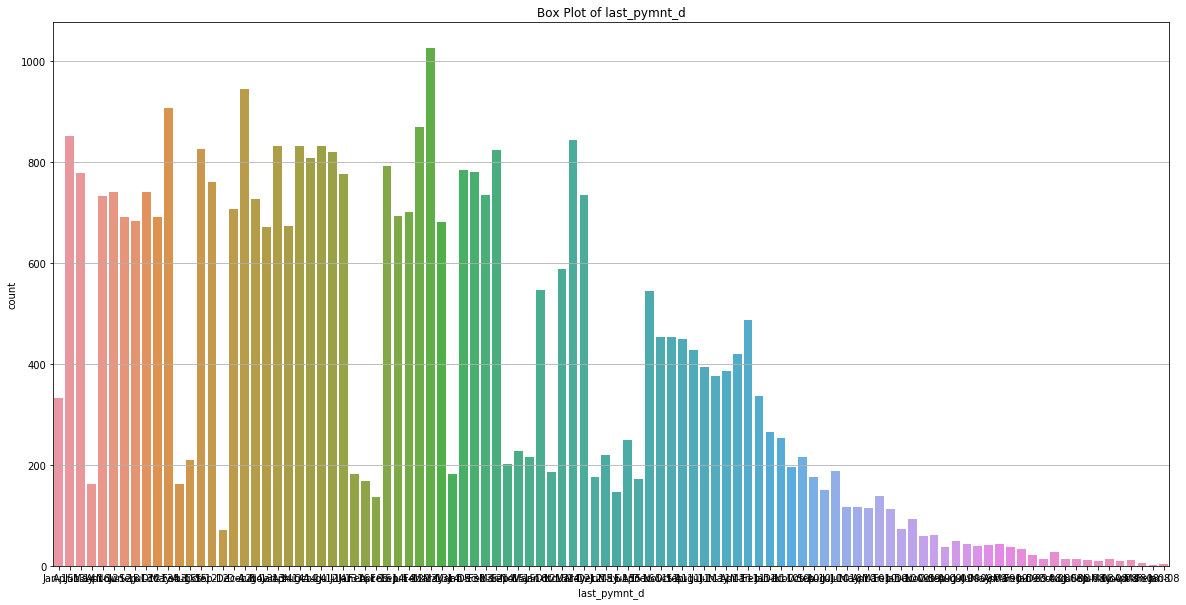

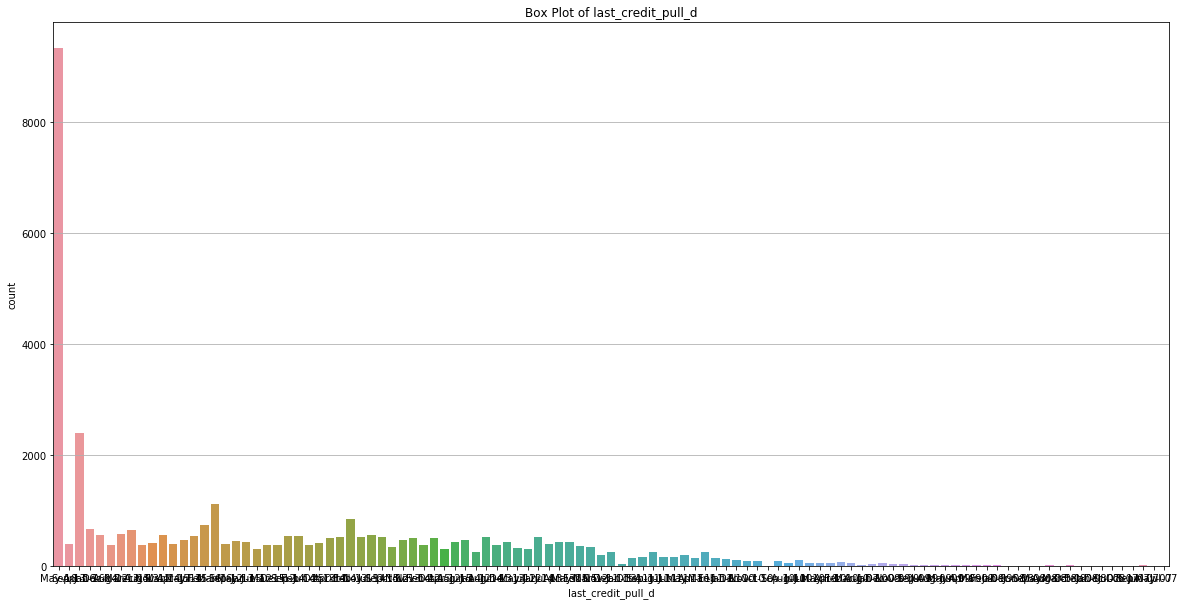

In [51]:
bp = PdfPages('BoxPlots with Univariate Object.pdf')
for cat_variable in cat_list:
    fig,axes = plt.subplots(figsize=(20,10))
    sns.countplot(x=cat_variable, data=loan_work)
    plt.title(str('Box Plot of ') + str(cat_variable))
    bp.savefig(fig)
bp.close()

### Bivariate analysis 

In [52]:
#Updating the list
cat_list = []
num_list = []

for variable in loan_work.columns:
    if loan_work[variable].dtype.name in ['object']:
        cat_list.append(variable)
    else:
        num_list.append(variable)

In [53]:
cat_list

['grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'purpose',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'last_pymnt_d',
 'last_credit_pull_d']

In [54]:
num_list

['loan_amnt',
 'term',
 'int_rate',
 'annual_inc',
 'dti',
 'inq_last_6mths',
 'open_acc',
 'revol_bal',
 'revol_util',
 'total_acc',
 'total_pymnt',
 'total_rec_int',
 'last_pymnt_amnt',
 'loan_status_cat']

#### Bivariate analysis of Numeric Variables:-

#### Observations:- 

	1> Loan with Higher Interest Rate have more chance of getting Charged Off.
	2> Customer doing lower payments or having higher revolving utilization are more inclined to default loans.
	3> Intutive enough - customer with higher inquiry rate is an indication of loan defaulting.

    Box Plot -

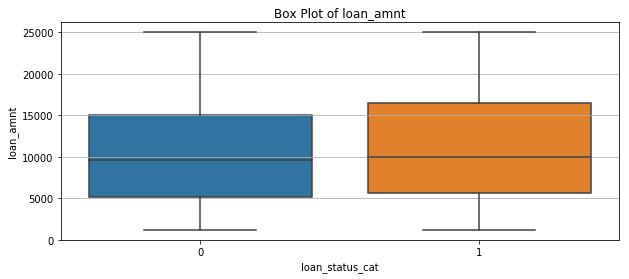

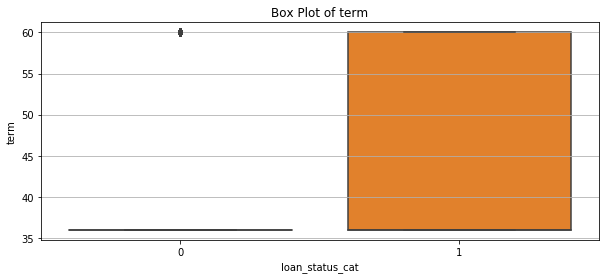

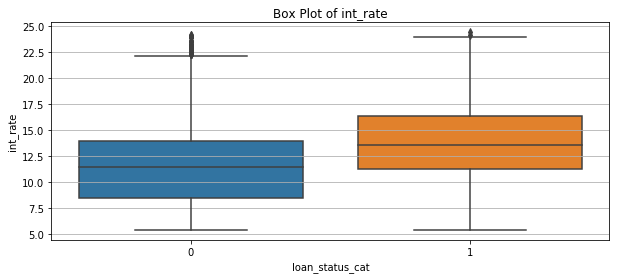

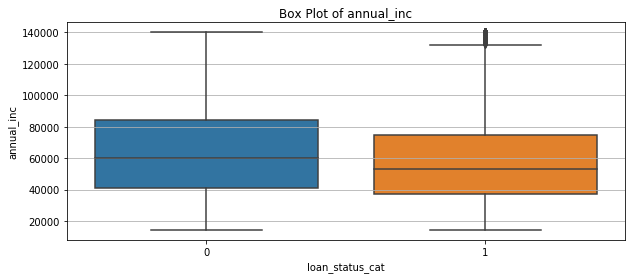

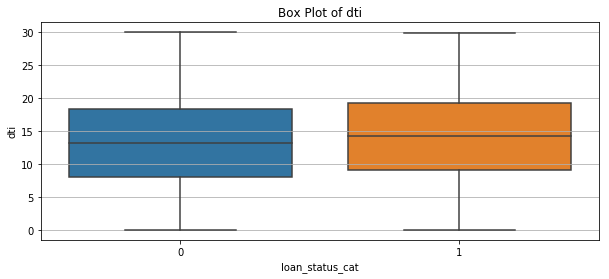

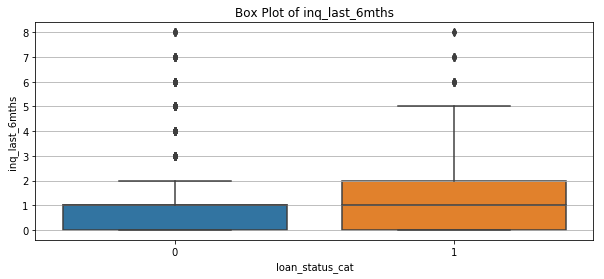

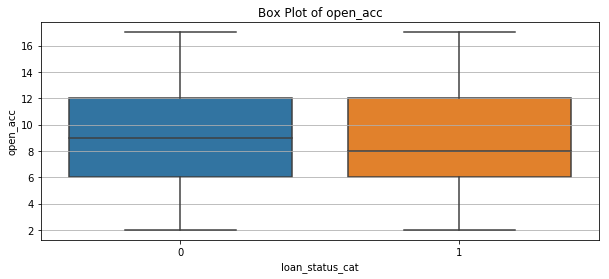

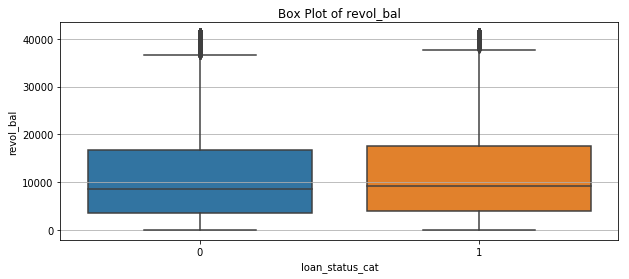

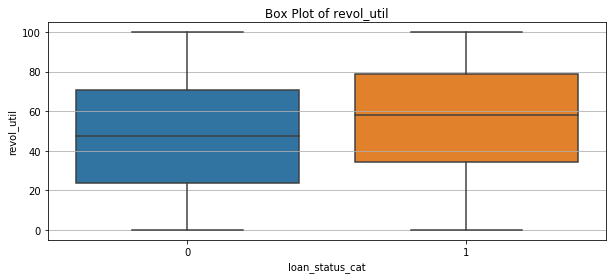

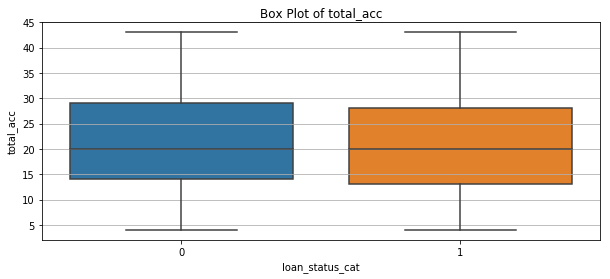

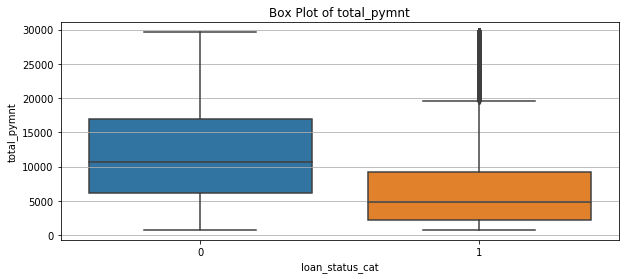

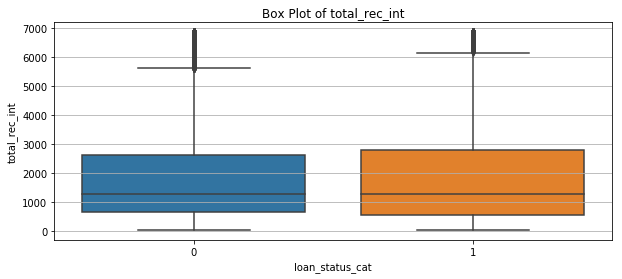

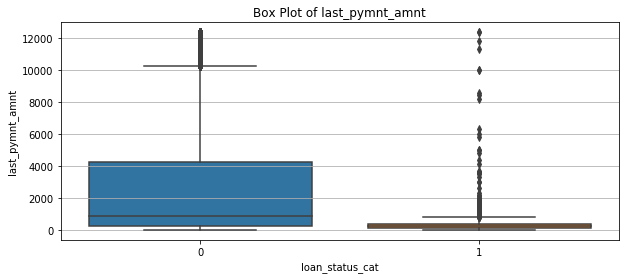

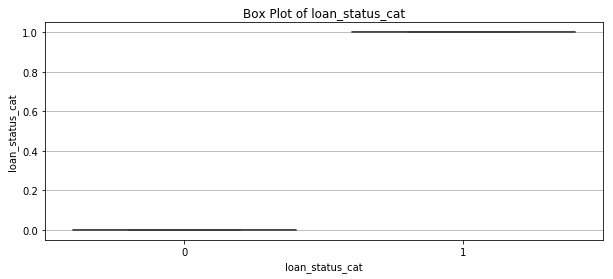

In [55]:
bp = PdfPages('BoxPlots Bivariate analysis.pdf')

for num_variable in num_list:
    fig,axes = plt.subplots(figsize=(10,4))
    sns.boxplot(x='loan_status_cat', y=num_variable, data = loan_work)
    plt.title(str('Box Plot of ') + str(num_variable))
    bp.savefig(fig)
bp.close()

    Density Plot -

C:\Users\lenovo\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\lenovo\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\lenovo\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


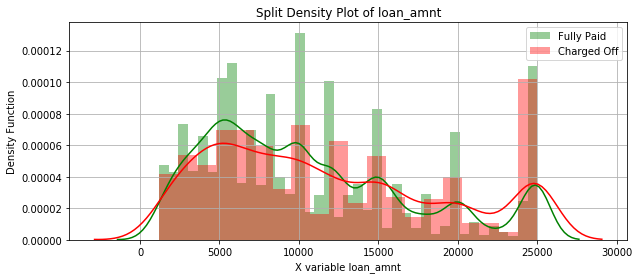

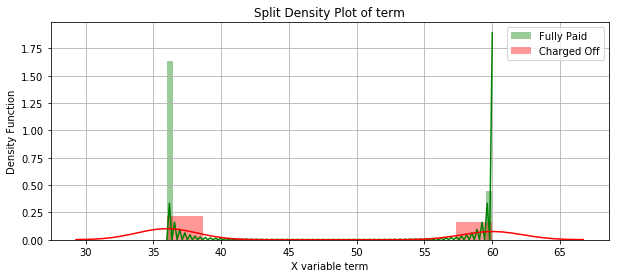

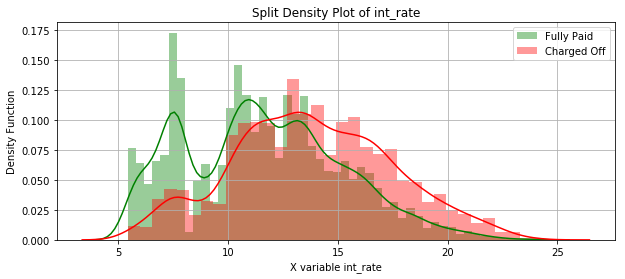

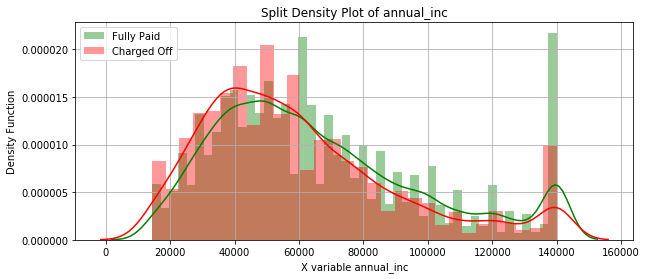

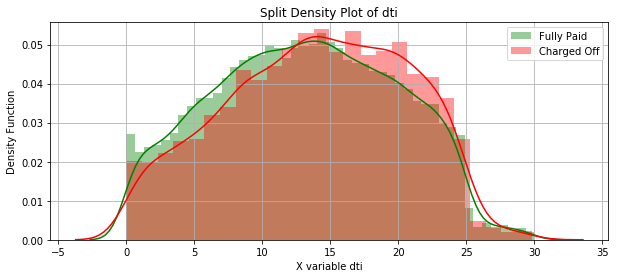

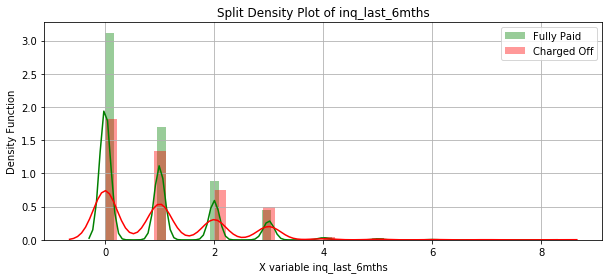

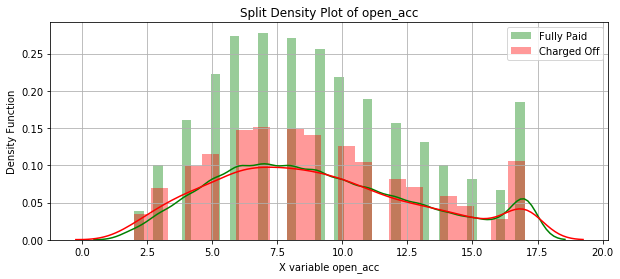

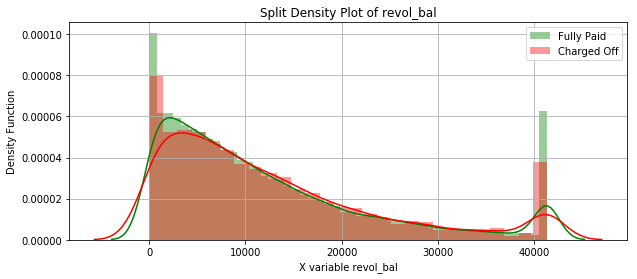

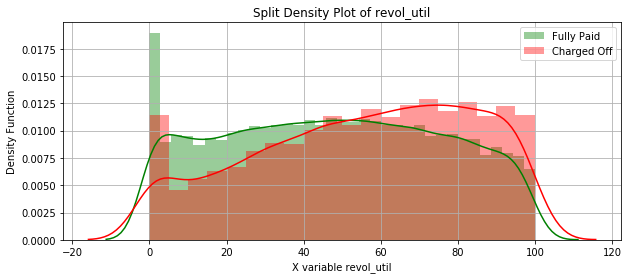

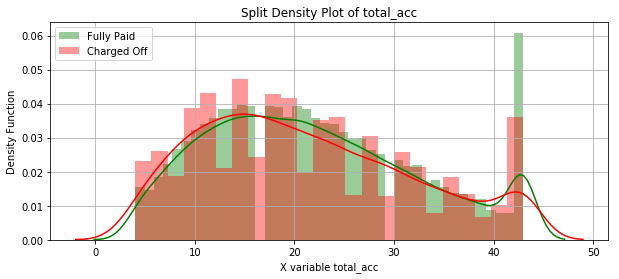

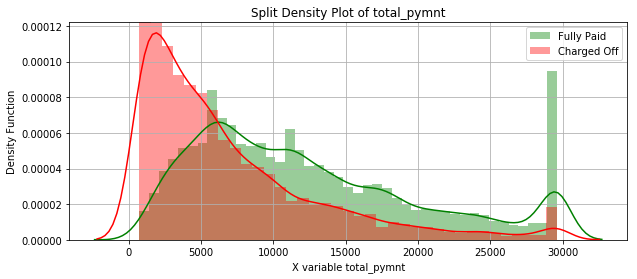

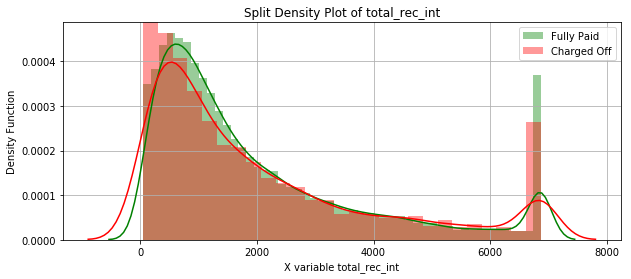

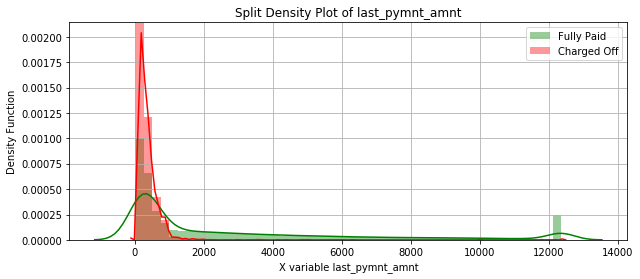

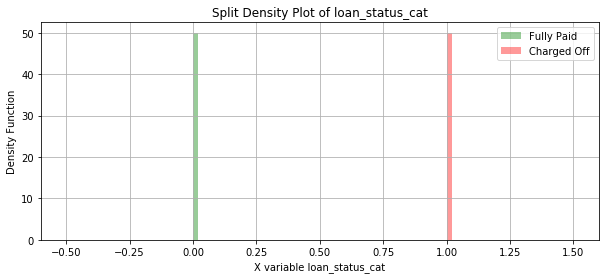

In [56]:
bp = PdfPages('Density Plots Bivariate analysis.pdf')

for num_variable in num_list:
    fig,axes = plt.subplots(figsize=(10,4))
    sns.distplot(loan_work[loan_work['loan_status_cat']==0][num_variable], label='Fully Paid', color='g', hist=True, norm_hist=False)
    sns.distplot(loan_work[loan_work['loan_status_cat']==1][num_variable], label='Charged Off', color='r', hist=True, norm_hist=False)
    plt.xlabel(str("X variable ") + str(num_variable) )
    plt.ylabel('Density Function')
    plt.title(str('Split Density Plot of ')+str(num_variable))
    plt.legend()
    bp.savefig(fig)

bp.close()

##### Hypothesis testing -
        If there is a significant relationship between the independent variables
        and the dependent variable Y (loan_status_cat), the slope will not equal zero. 
        
        Null hypothesis states that the slope is equal to zero, 
        and the alternative hypothesis states that the slope is not equal to zero.
        
        Since the pvalue is quite low or all - we can NOT reject NULL hypothsis.
        - There is a significant linear relationship between the columns and loan_status_cat.

In [57]:
## Categorical Variable
chisq_df = pd.DataFrame()
for cat_variable in cat_list:
    cross_tab = pd.crosstab(loan_work[cat_variable],loan_work['loan_status_cat'], margins=False)
    stats.chi2_contingency(observed=cross_tab)[1]
    temp = pd.DataFrame([cat_variable,stats.chi2_contingency(observed=cross_tab)[0],stats.chi2_contingency(observed=cross_tab)[1] ]).T
    temp.columns = ['Variable', 'ChiSquare','P-Value']
    chisq_df = pd.concat([chisq_df, temp], axis=0, ignore_index=True)
    
print(chisq_df, '\n')

## Numerical Variable
tstats_df = pd.DataFrame()
for num_variable in num_list:
    tstats = stats.ttest_ind(loan_work[loan_work['loan_status_cat']==1][num_variable],loan_work[loan_work['loan_status_cat']==0][num_variable])
    temp = pd.DataFrame([num_variable, tstats[0], tstats[1]]).T
    temp.columns = ['Variable Name', 'T-Statistic', 'P-Value']
    tstats_df = pd.concat([tstats_df, temp], axis=0, ignore_index=True)

print(tstats_df)

               Variable ChiSquare       P-Value
0                 grade   1581.19             0
1             sub_grade   1689.07             0
2            emp_length   69.5847   1.46508e-10
3        home_ownership   22.2329   0.000180117
4   verification_status   89.8557    3.0767e-20
5               issue_d   210.904    2.0786e-20
6               purpose   378.944   6.21396e-73
7              zip_code   1090.97   6.69541e-10
8            addr_state   159.415   1.30917e-13
9      earliest_cr_line   592.952     0.0181411
10         last_pymnt_d   2298.89             0
11   last_credit_pull_d   1595.89  3.03397e-264 

      Variable Name T-Statistic       P-Value
0         loan_amnt     11.0668   2.00554e-28
1              term     34.5983  2.43151e-258
2          int_rate     42.4781             0
3        annual_inc    -13.3071   2.58416e-40
4               dti     8.86251   8.15008e-19
5    inq_last_6mths     14.1538   2.29931e-45
6          open_acc    -2.46872     0.0135639
7     

    Transformation Plots - To check if bucking is required or not.
    - No bucketing required

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


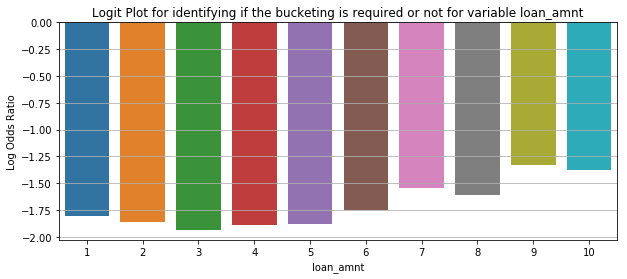

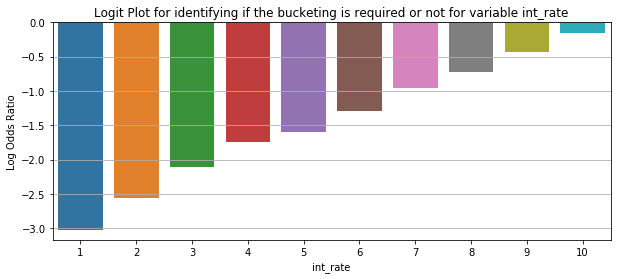

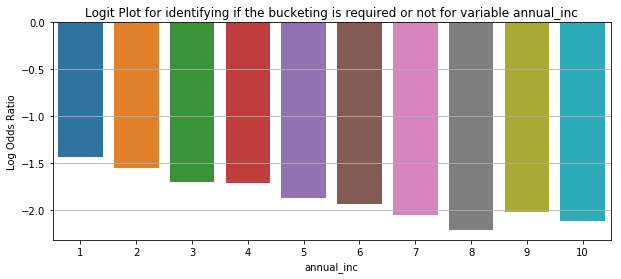

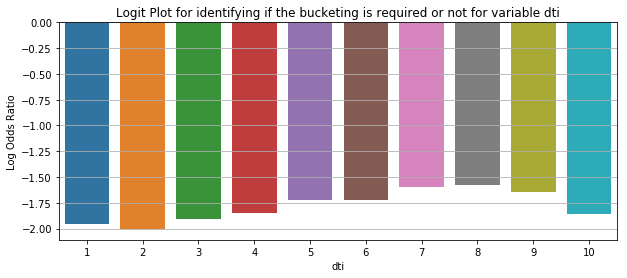

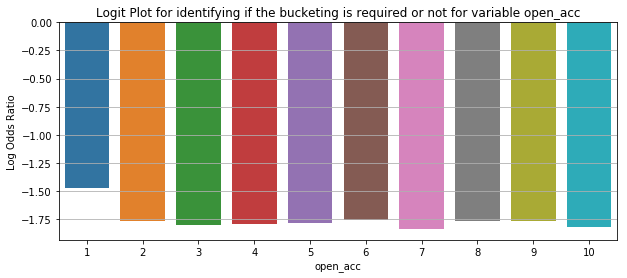

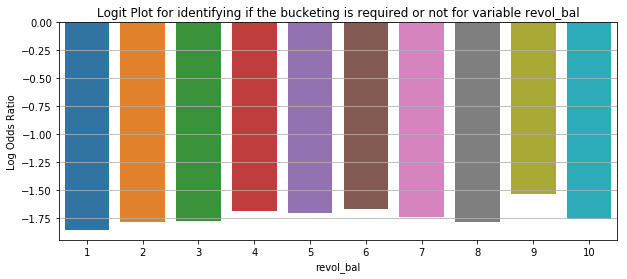

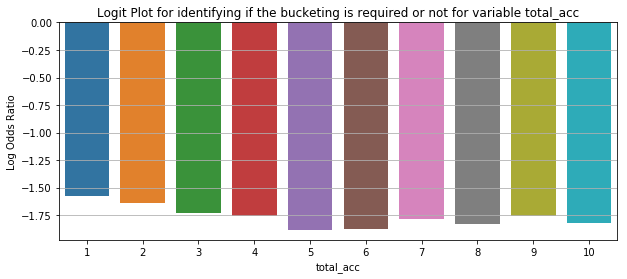

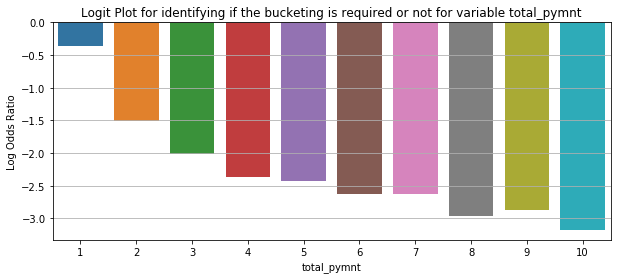

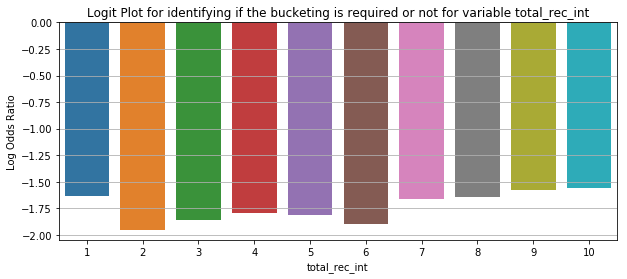

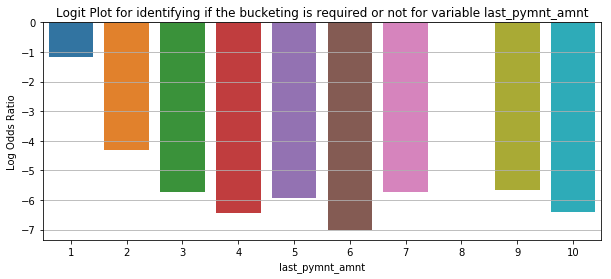

In [58]:
bp = PdfPages('Transformation Plots.pdf')

for num_variable in ['loan_amnt','int_rate','annual_inc','dti','open_acc','revol_bal','total_acc','total_pymnt','total_rec_int','last_pymnt_amnt']:
    binned = pd.cut(loan_work[num_variable], bins=10, labels=list(range(1,11)))
    binned = binned.dropna()
    ser = loan_work.groupby(binned)['loan_status_cat'].sum() / (loan_work.groupby(binned)['loan_status_cat'].count()-loan_work.groupby(binned)['loan_status_cat'].sum())
    ser = np.log(ser)
    fig,axes = plt.subplots(figsize=(10,4))
    sns.barplot(x=ser.index,y=ser)
    plt.ylabel('Log Odds Ratio')
    plt.title(str('Logit Plot for identifying if the bucketing is required or not for variable ') + str(num_variable))
    bp.savefig(fig)

bp.close()


#### Bivariate analysis of Categorical Variables:-

##### Observations:- 

	1> LC assigned loan grade having significantly high Charge Off rate are in order - G, F and E
	2> Loans taken for the purpose of "Small Business" have high rate of Charge Off.
	3> Significantly high loan charge off is seen in state NE - Nebraska.
    4> There are substantial amount of customers where employment length is not available, 
    among those anomalous customers good amount of charged off Loan can be found


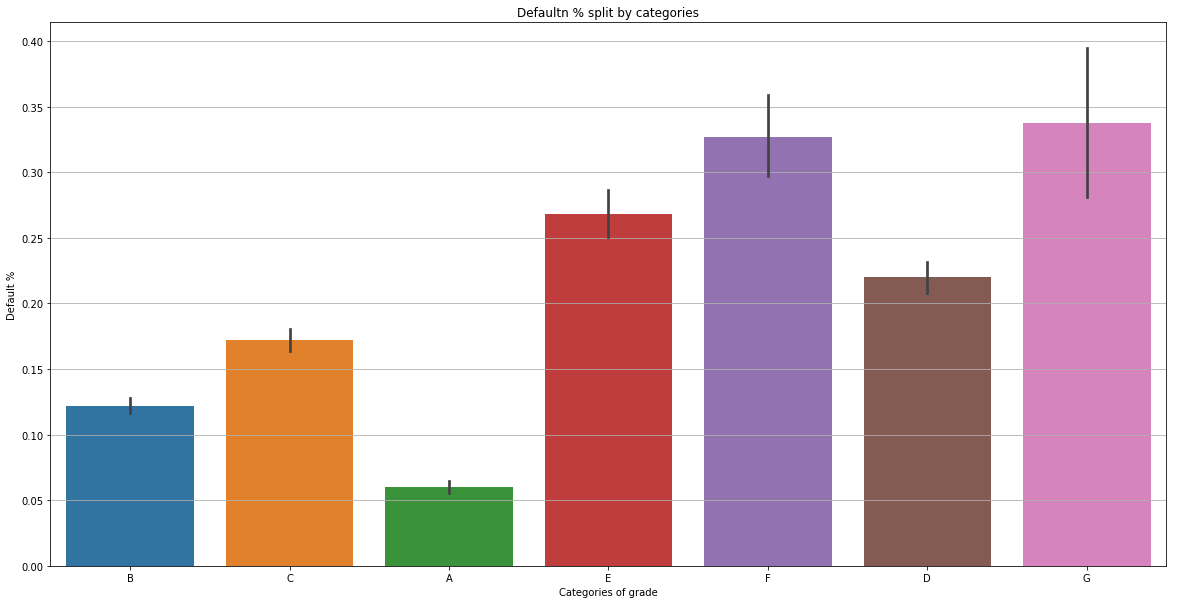

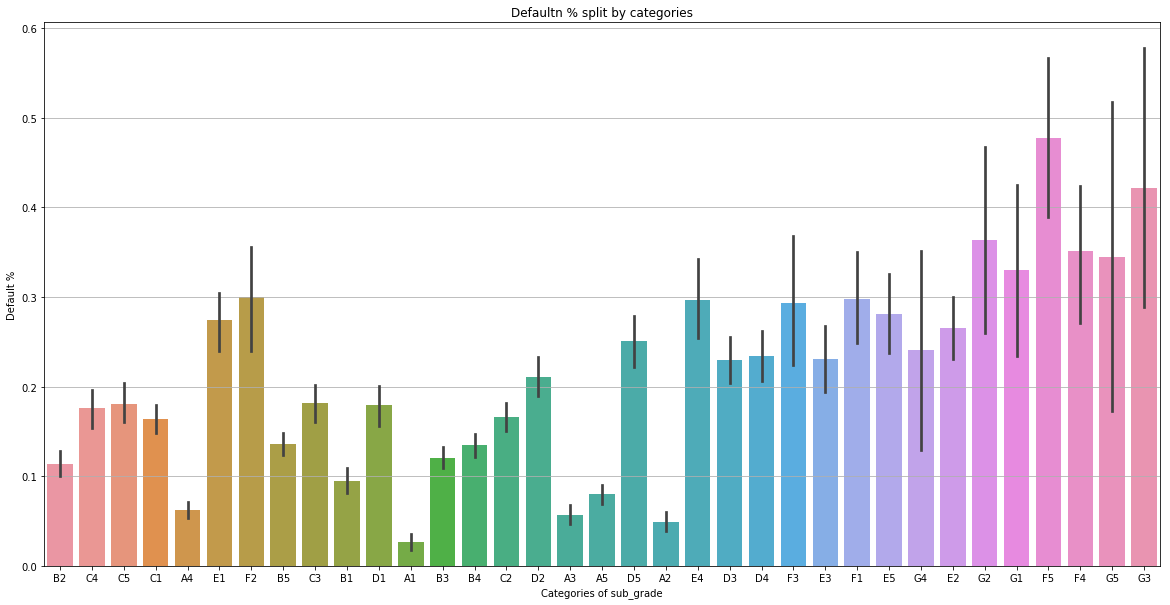

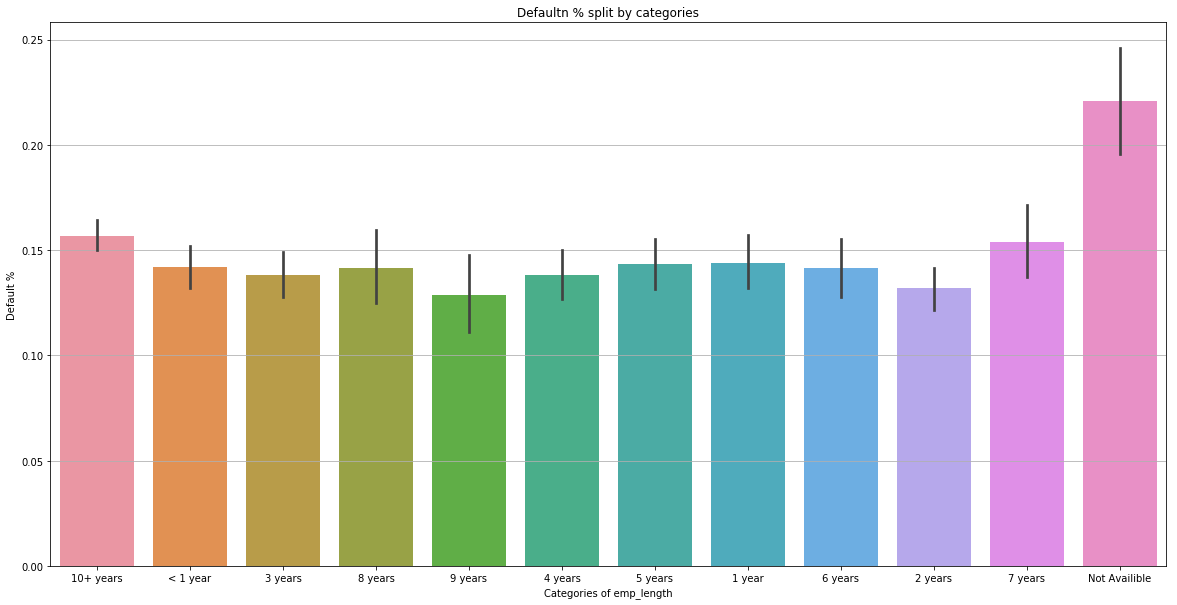

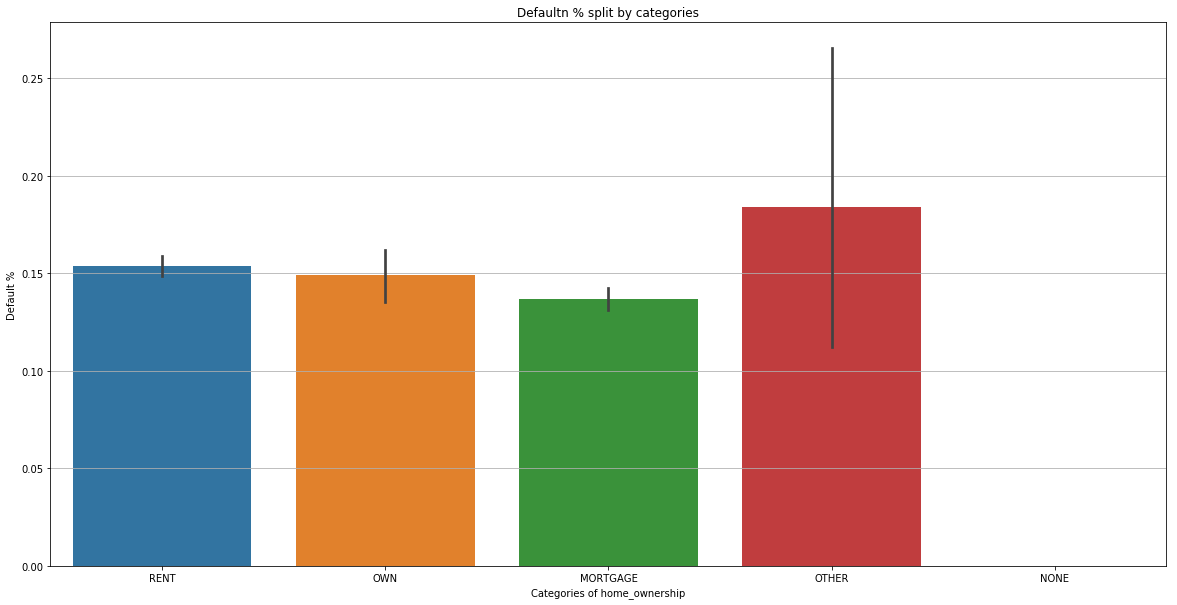

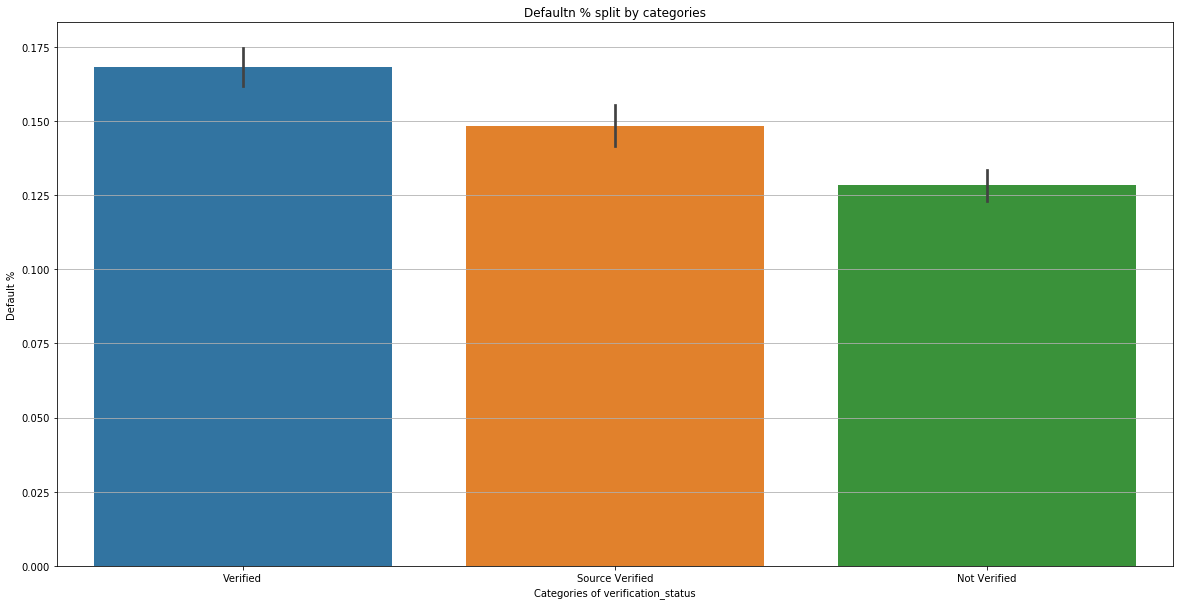

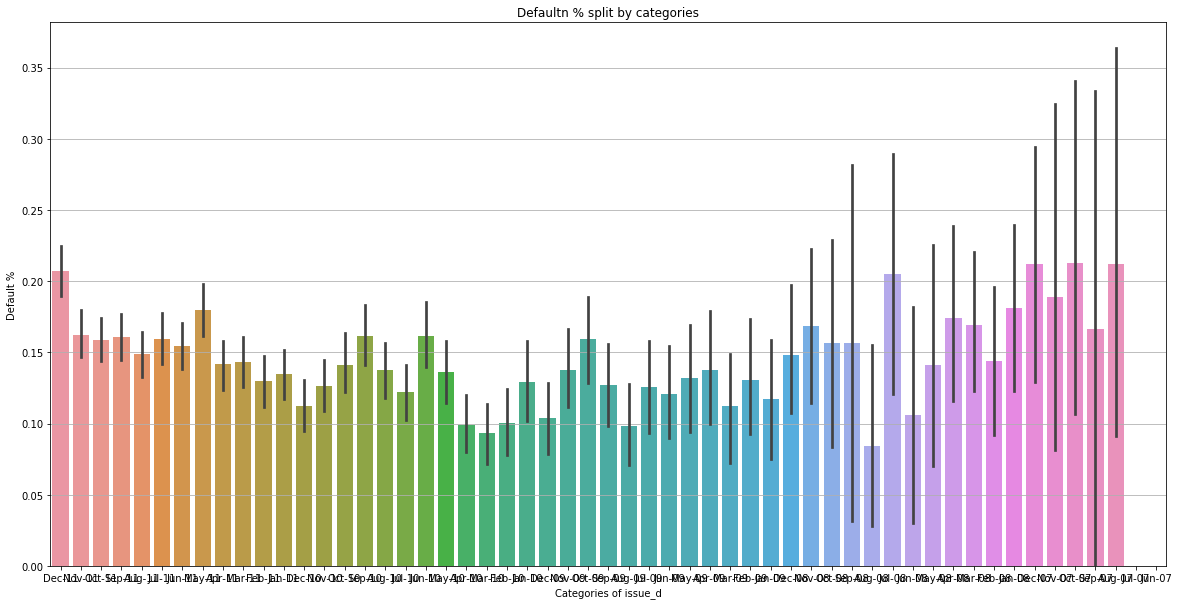

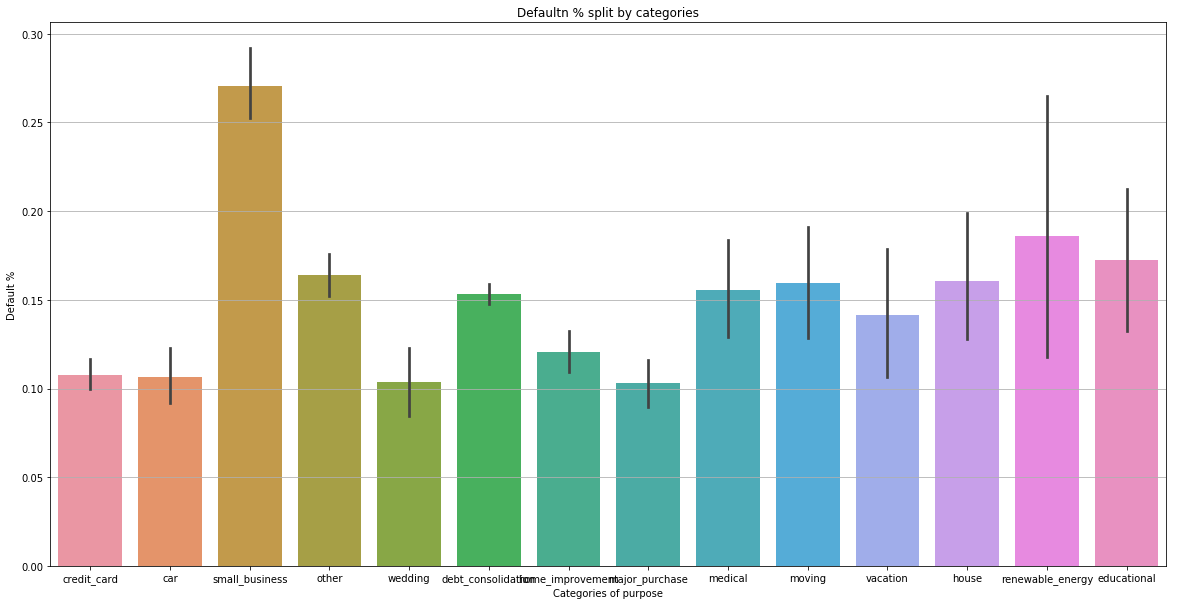

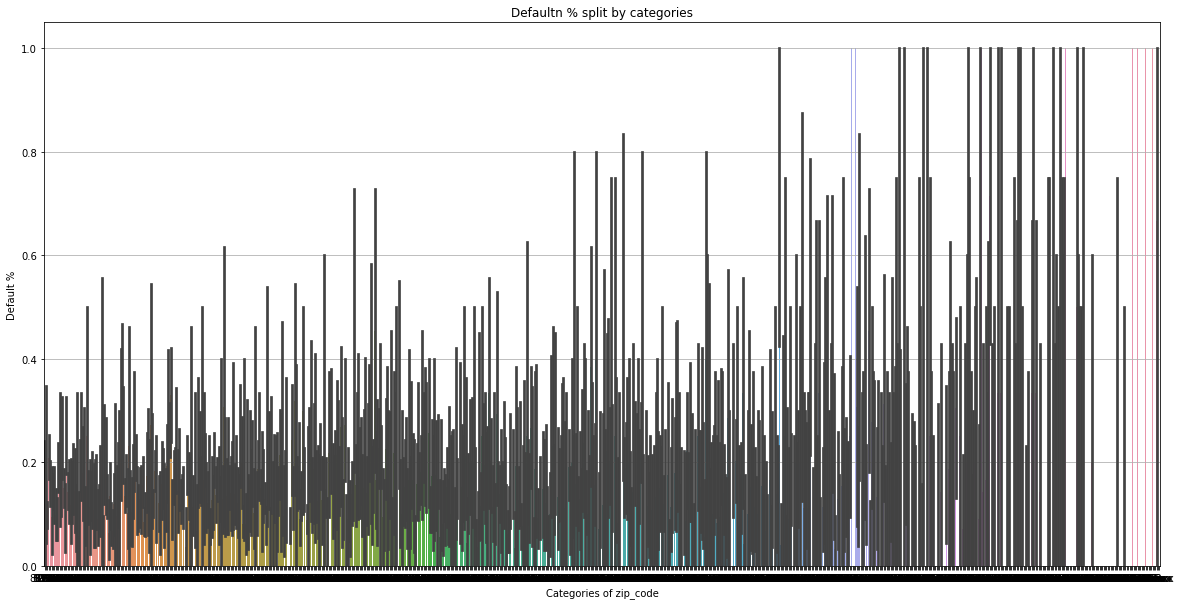

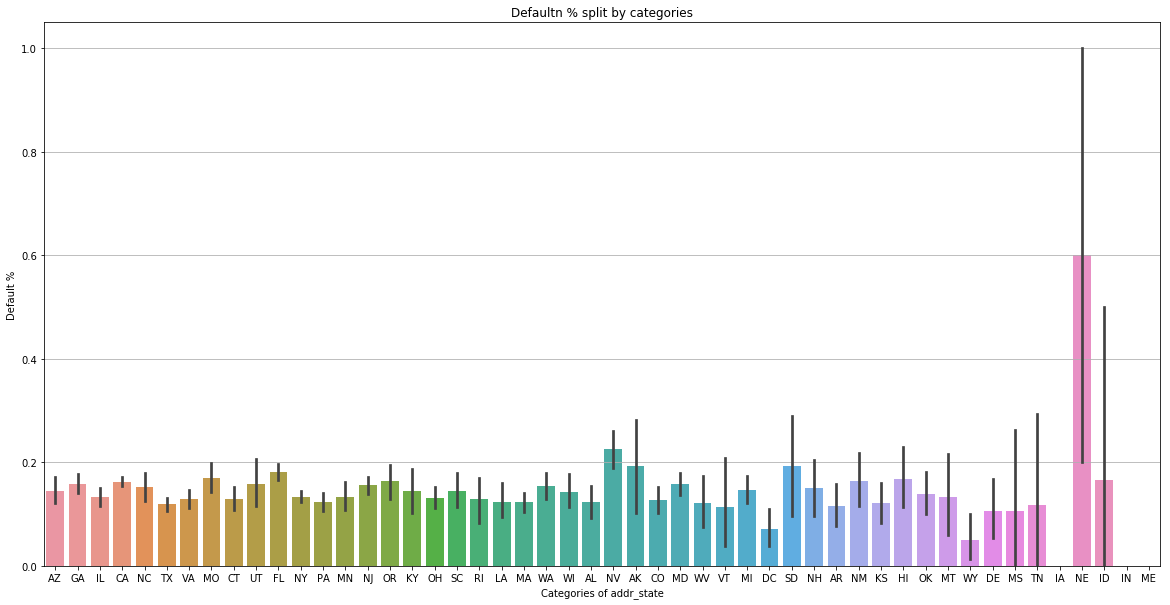

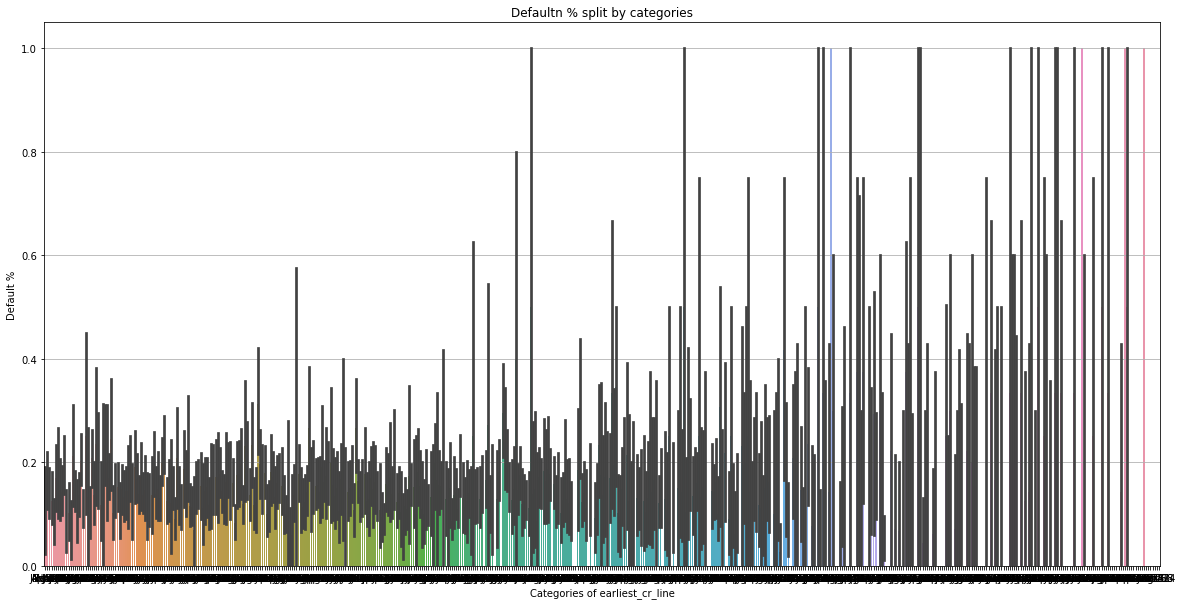

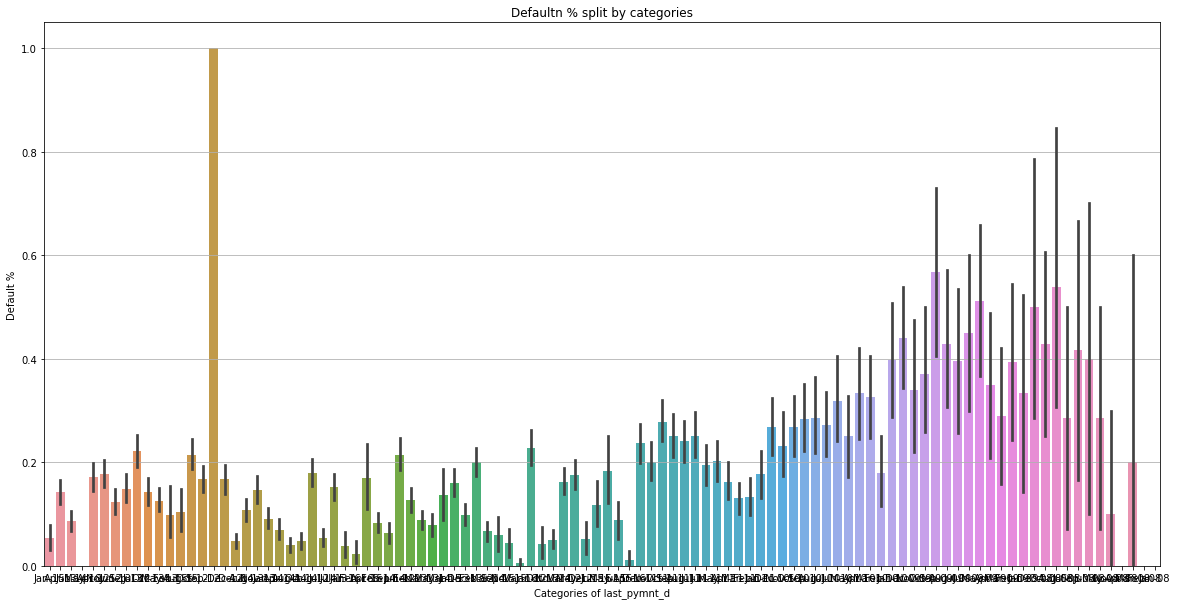

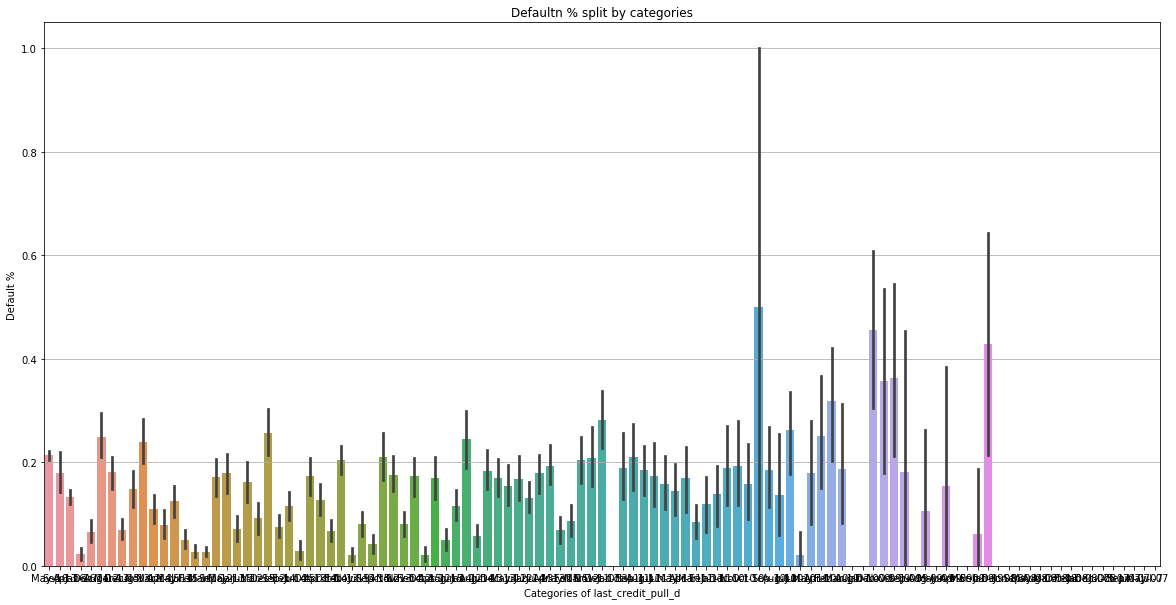

In [59]:
bp = PdfPages('Bivariate analysis of Categorical Variables.pdf')

for cat_variable in cat_list:
    fig,axes = plt.subplots(figsize=(20,10))
    sns.barplot(x=cat_variable,y='loan_status_cat',data=loan_work) 
    plt.ylabel('Default %')
    plt.xlabel(str('Categories of ') + str(cat_variable))
    plt.title('Defaultn % split by categories')
    bp.savefig(fig)

bp.close()

    Observation 1 - LC assigned loan grade having significantly high Charge Off rate are in order - G, F and E
   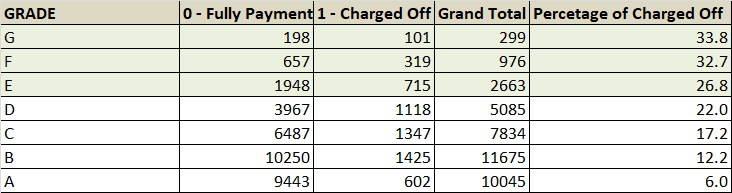

In [61]:
pd.pivot_table(loan_work,index=["grade"],values=["emp_length"],
               columns=["loan_status_cat"],aggfunc='count')

emp_length      
loan_status_cat          0     1
grade                           
A                     9443   602
B                    10250  1425
C                     6487  1347
D                     3967  1118
E                     1948   715
F                      657   319
G                      198   101

    Among G,F and E follwing sub grades show high charged off rate -
   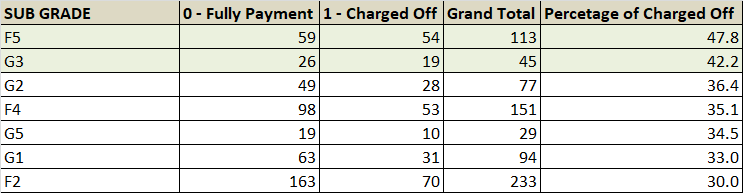

In [62]:
pd.pivot_table(loan_work,index=["sub_grade"],values=["emp_length"],
               columns=["loan_status_cat"],aggfunc='count')

emp_length     
loan_status_cat          0    1
sub_grade                      
A1                    1109   30
A2                    1434   74
A3                    1707  103
A4                    2695  178
A5                    2498  217
B1                    1626  171
B2                    1773  228
B3                    2484  341
B4                    2108  329
B5                    2259  356
C1                    1719  336
C2                    1610  321
C3                    1218  270
C4                     994  212
C5                     946  208
D1                     764  167
D2                    1015  271
D3                     860  256
D4                     703  215
D5                     625  209
E1                     524  198
E2                     451  163
E3                     397  119
E4                     298  126
E5                     278  109
F1                     214   91
F2                     163   70
F3                     123   51
F4                      98   53
F5                      59   54
G1                      63   31
G2                      49   28
G3                      26   19
G4                      41   13
G5                      19   10

    Observation 2 - Loans taken for the purpose of "Small Business" have high rate of Charge Off 
    follwed by "Renewable_energy"

   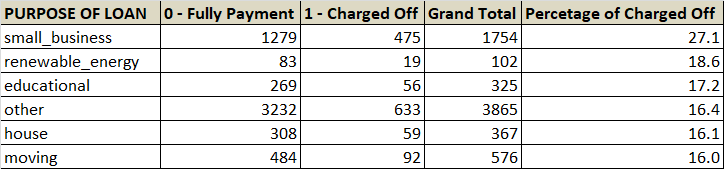

In [63]:
pd.pivot_table(loan_work,index=["purpose"],values=["emp_length"],
               columns=["loan_status_cat"],aggfunc='count')

emp_length      
loan_status_cat             0     1
purpose                            
car                      1339   160
credit_card              4485   542
debt_consolidation      15288  2767
educational               269    56
home_improvement         2528   347
house                     308    59
major_purchase           1928   222
medical                   575   106
moving                    484    92
other                    3232   633
renewable_energy           83    19
small_business           1279   475
vacation                  322    53
wedding                   830    96

    Observation 3 - Significantly high loan charged off rate is seen in state "NE - Nebraska"
    follwed by NV - Nevada and SD - South Dakota

   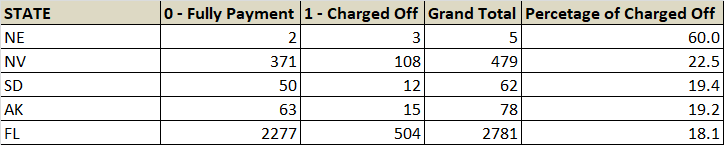

In [64]:
pd.pivot_table(loan_work,index=["addr_state"],values=["emp_length"],
               columns=["loan_status_cat"],aggfunc='count')

emp_length        
loan_status_cat          0       1
addr_state                        
AK                    63.0    15.0
AL                   381.0    54.0
AR                   208.0    27.0
AZ                   726.0   123.0
CA                  5824.0  1125.0
CO                   668.0    98.0
CT                   632.0    94.0
DC                   196.0    15.0
DE                   101.0    12.0
FL                  2277.0   504.0
GA                  1144.0   215.0
HI                   138.0    28.0
IA                     5.0     NaN
ID                     5.0     1.0
IL                  1281.0   197.0
IN                     9.0     NaN
KS                   224.0    31.0
KY                   266.0    45.0
LA                   374.0    53.0
MA                  1138.0   159.0
MD                   861.0   162.0
ME                     3.0     NaN
MI                   601.0   103.0
MN                   524.0    81.0
MO                   556.0   114.0
MS                    17.0     2.0
MT                    72.0    11.0
NC                   636.0   114.0
NE                     2.0     3.0
NH                   141.0    25.0
NJ                  1512.0   278.0
NM                   153.0    30.0
NV                   371.0   108.0
NY                  3203.0   495.0
OH                  1023.0   155.0
OK                   247.0    40.0
OR                   364.0    71.0
PA                  1288.0   180.0
RI                   169.0    25.0
SC                   393.0    66.0
SD                    50.0    12.0
TN                    15.0     2.0
TX                  2343.0   316.0
UT                   212.0    40.0
VA                  1192.0   177.0
VT                    47.0     6.0
WA                   691.0   127.0
WI                   377.0    63.0
WV                   151.0    21.0
WY                    76.0     4.0

##### Looking into the dates:-
    There is no significant pattern in the dates spikes.
    
    Intutive to learn:-
    There are some cases where the last LC pulled credit date (last credit pull_d) is as late as 2009; 
    out of which quite a few are getting chraged off.

    Bar Plot -

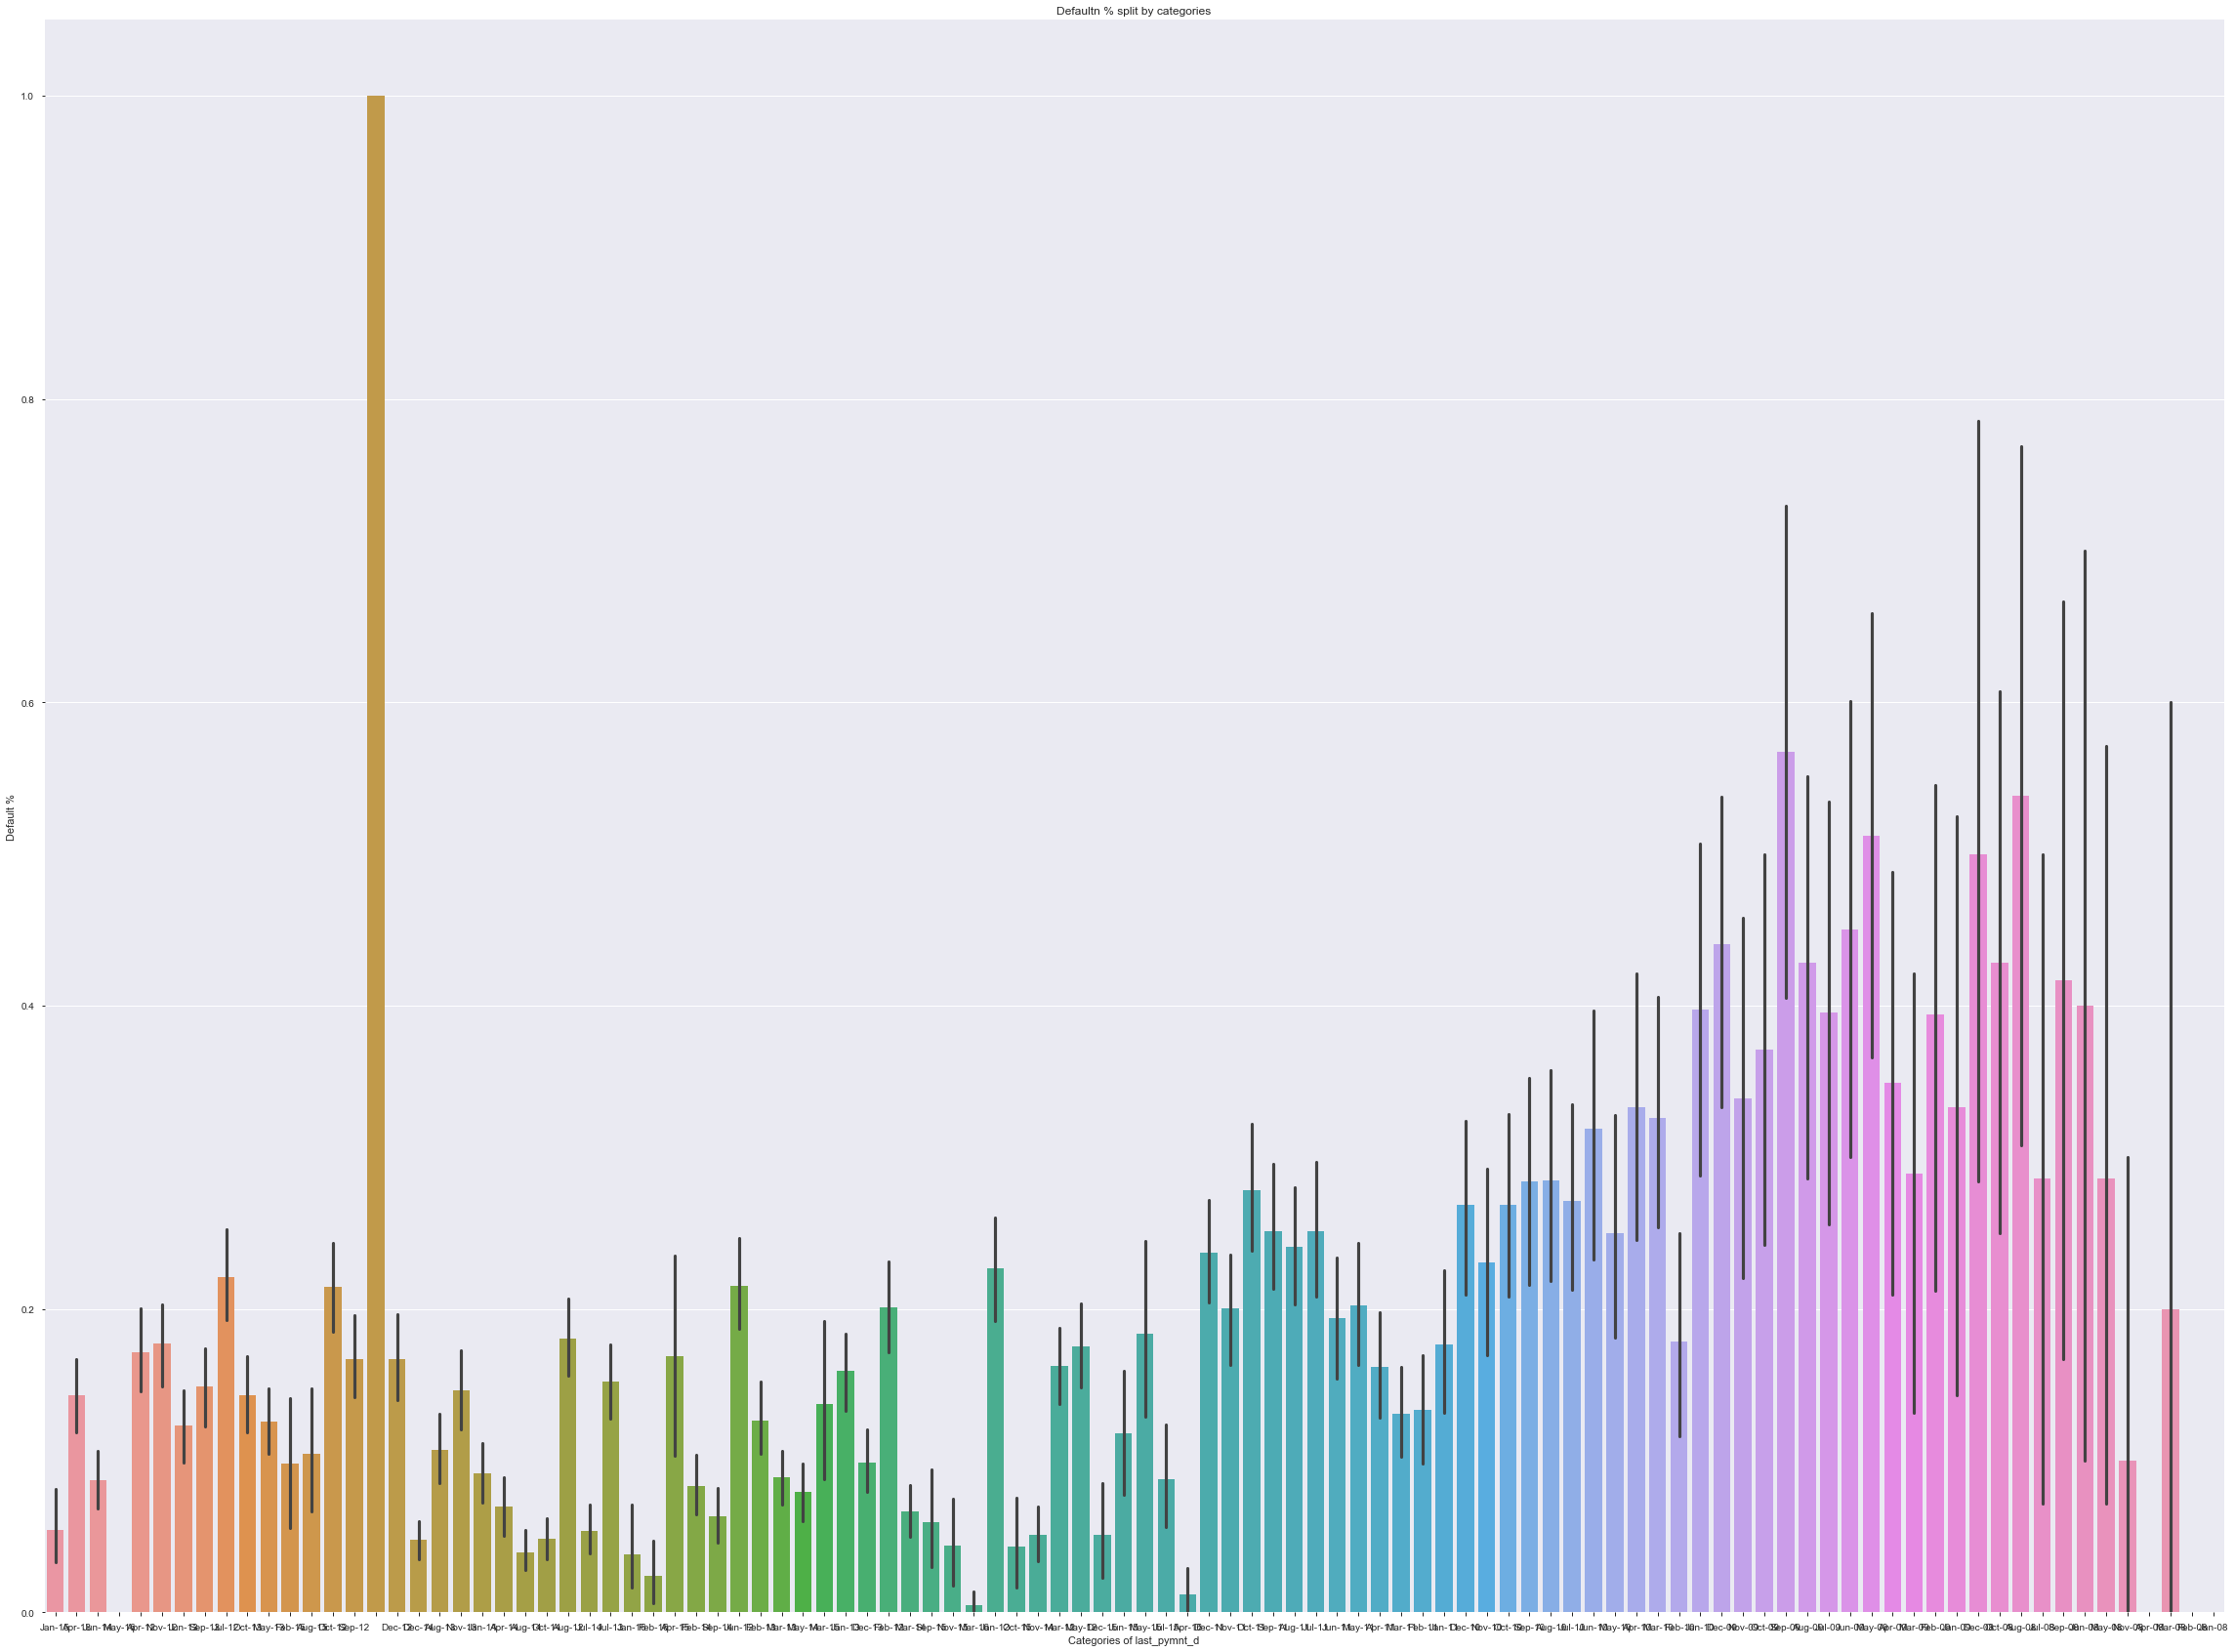

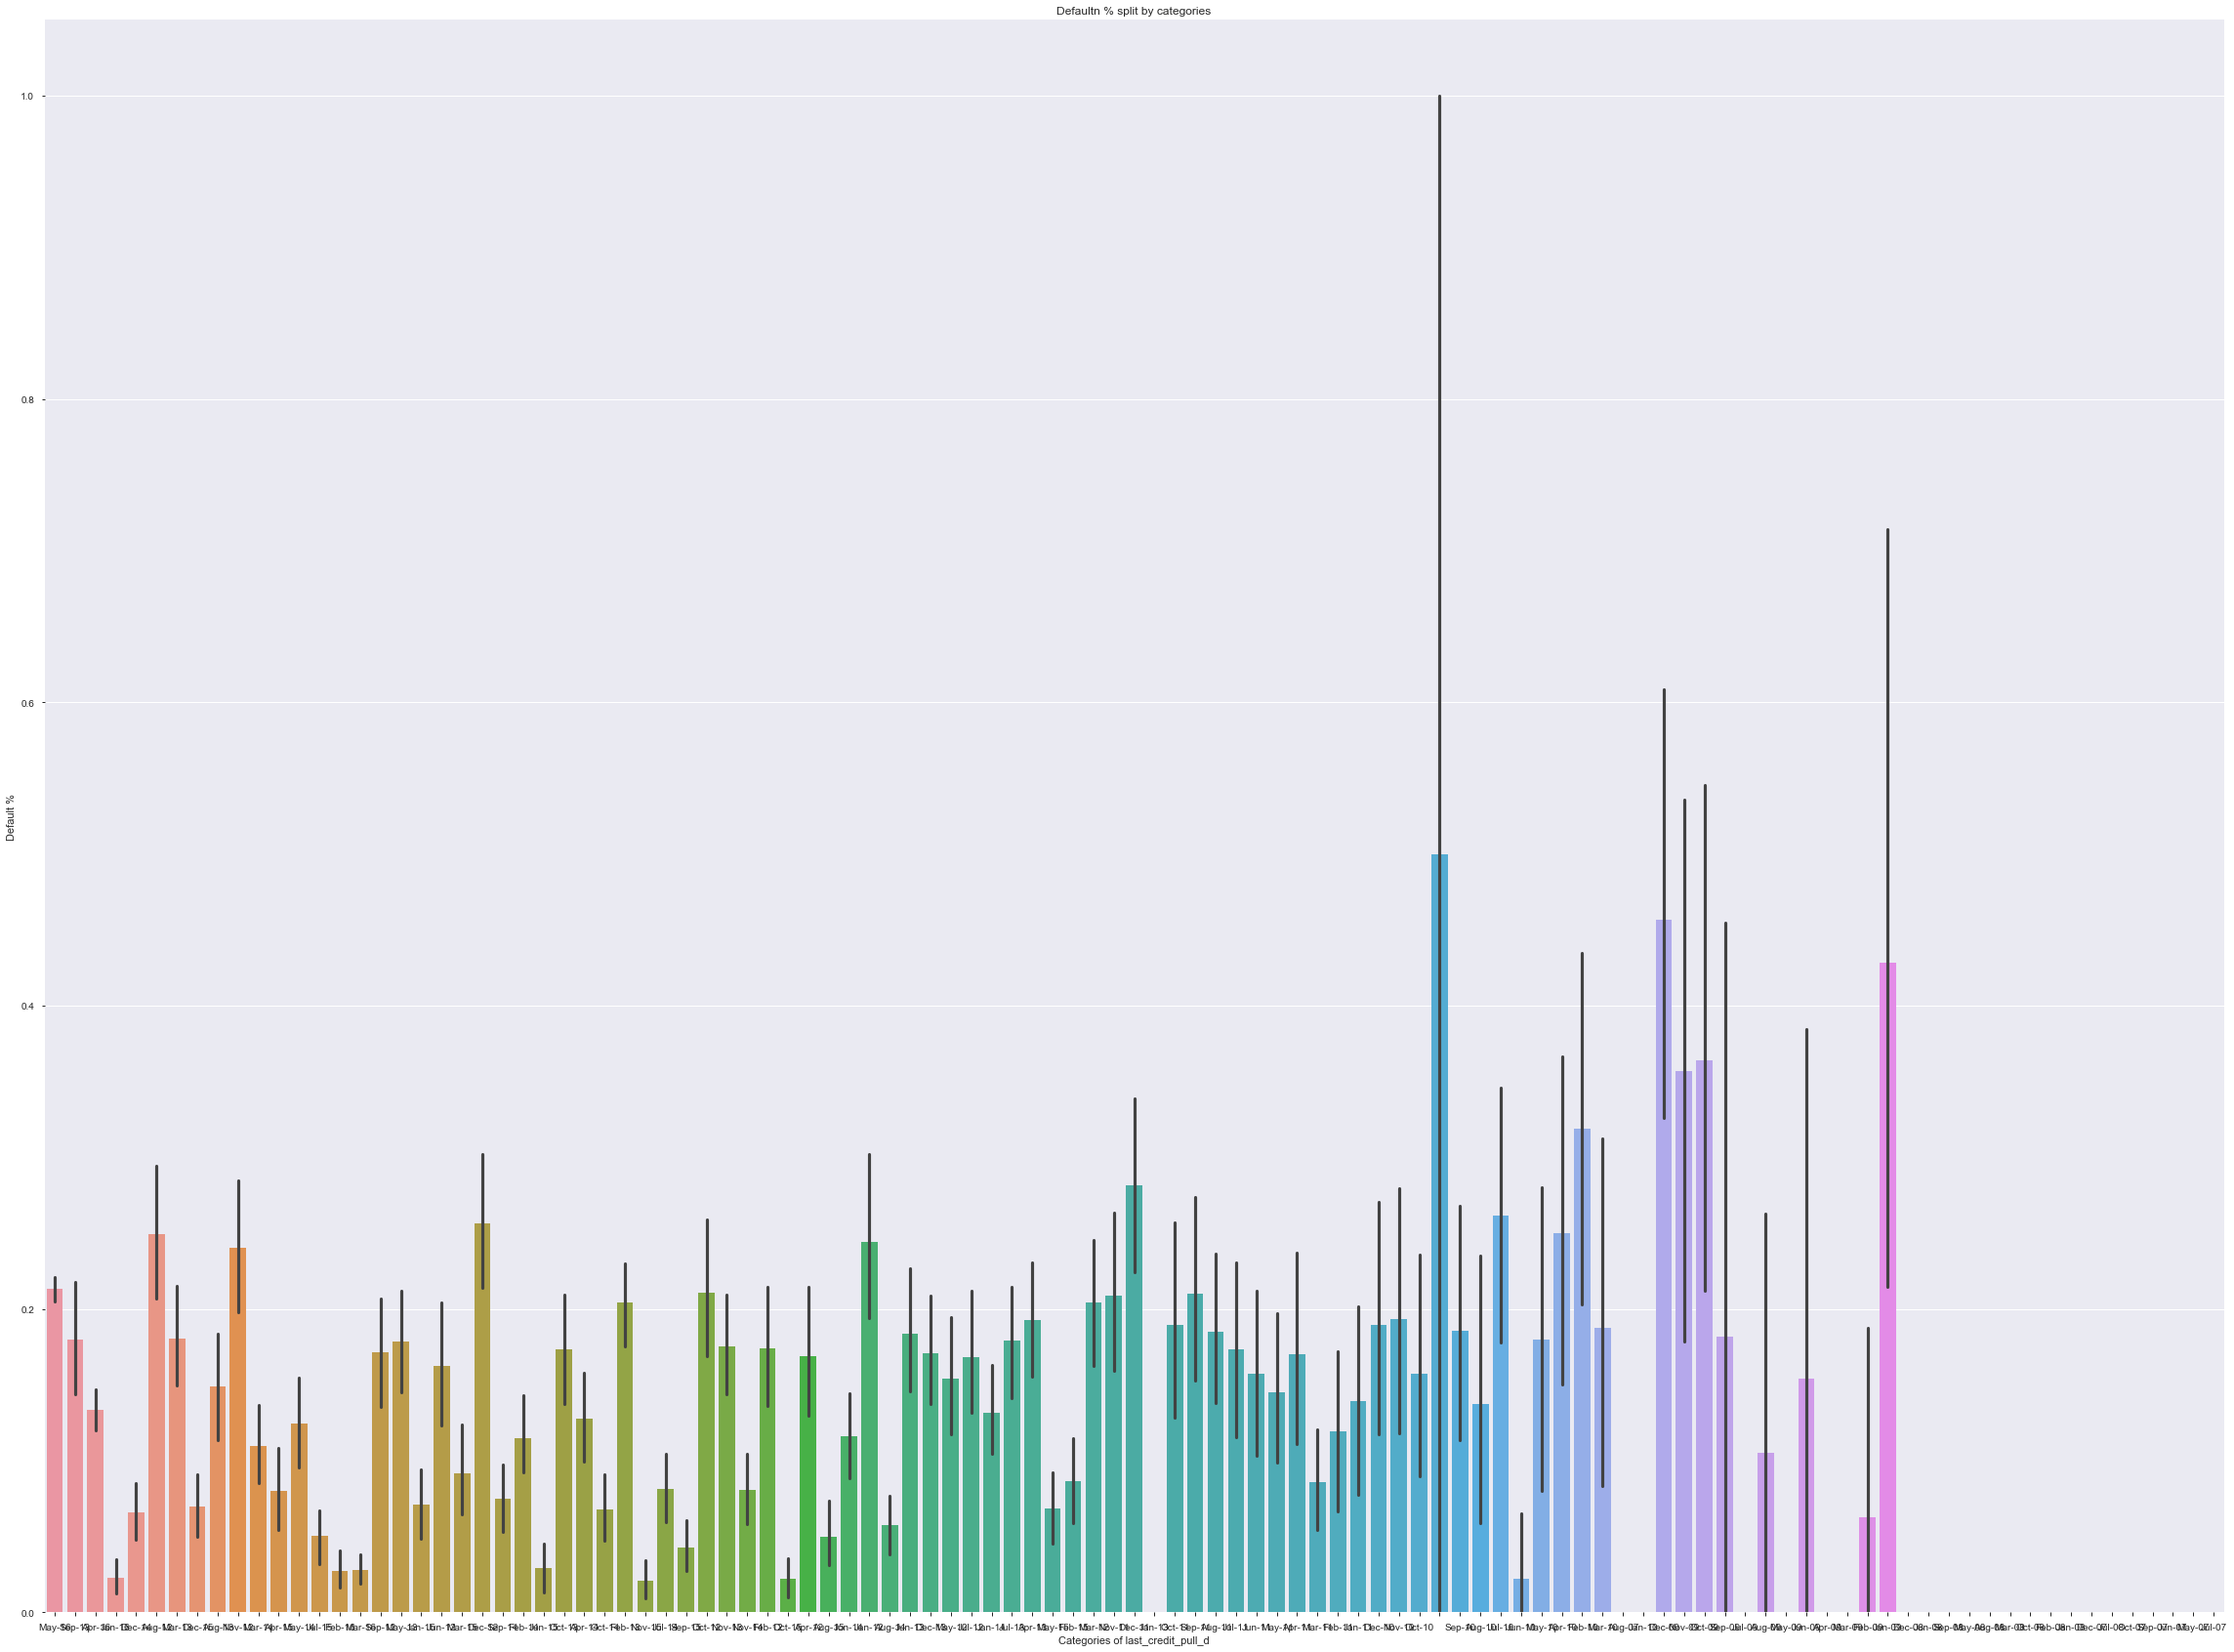

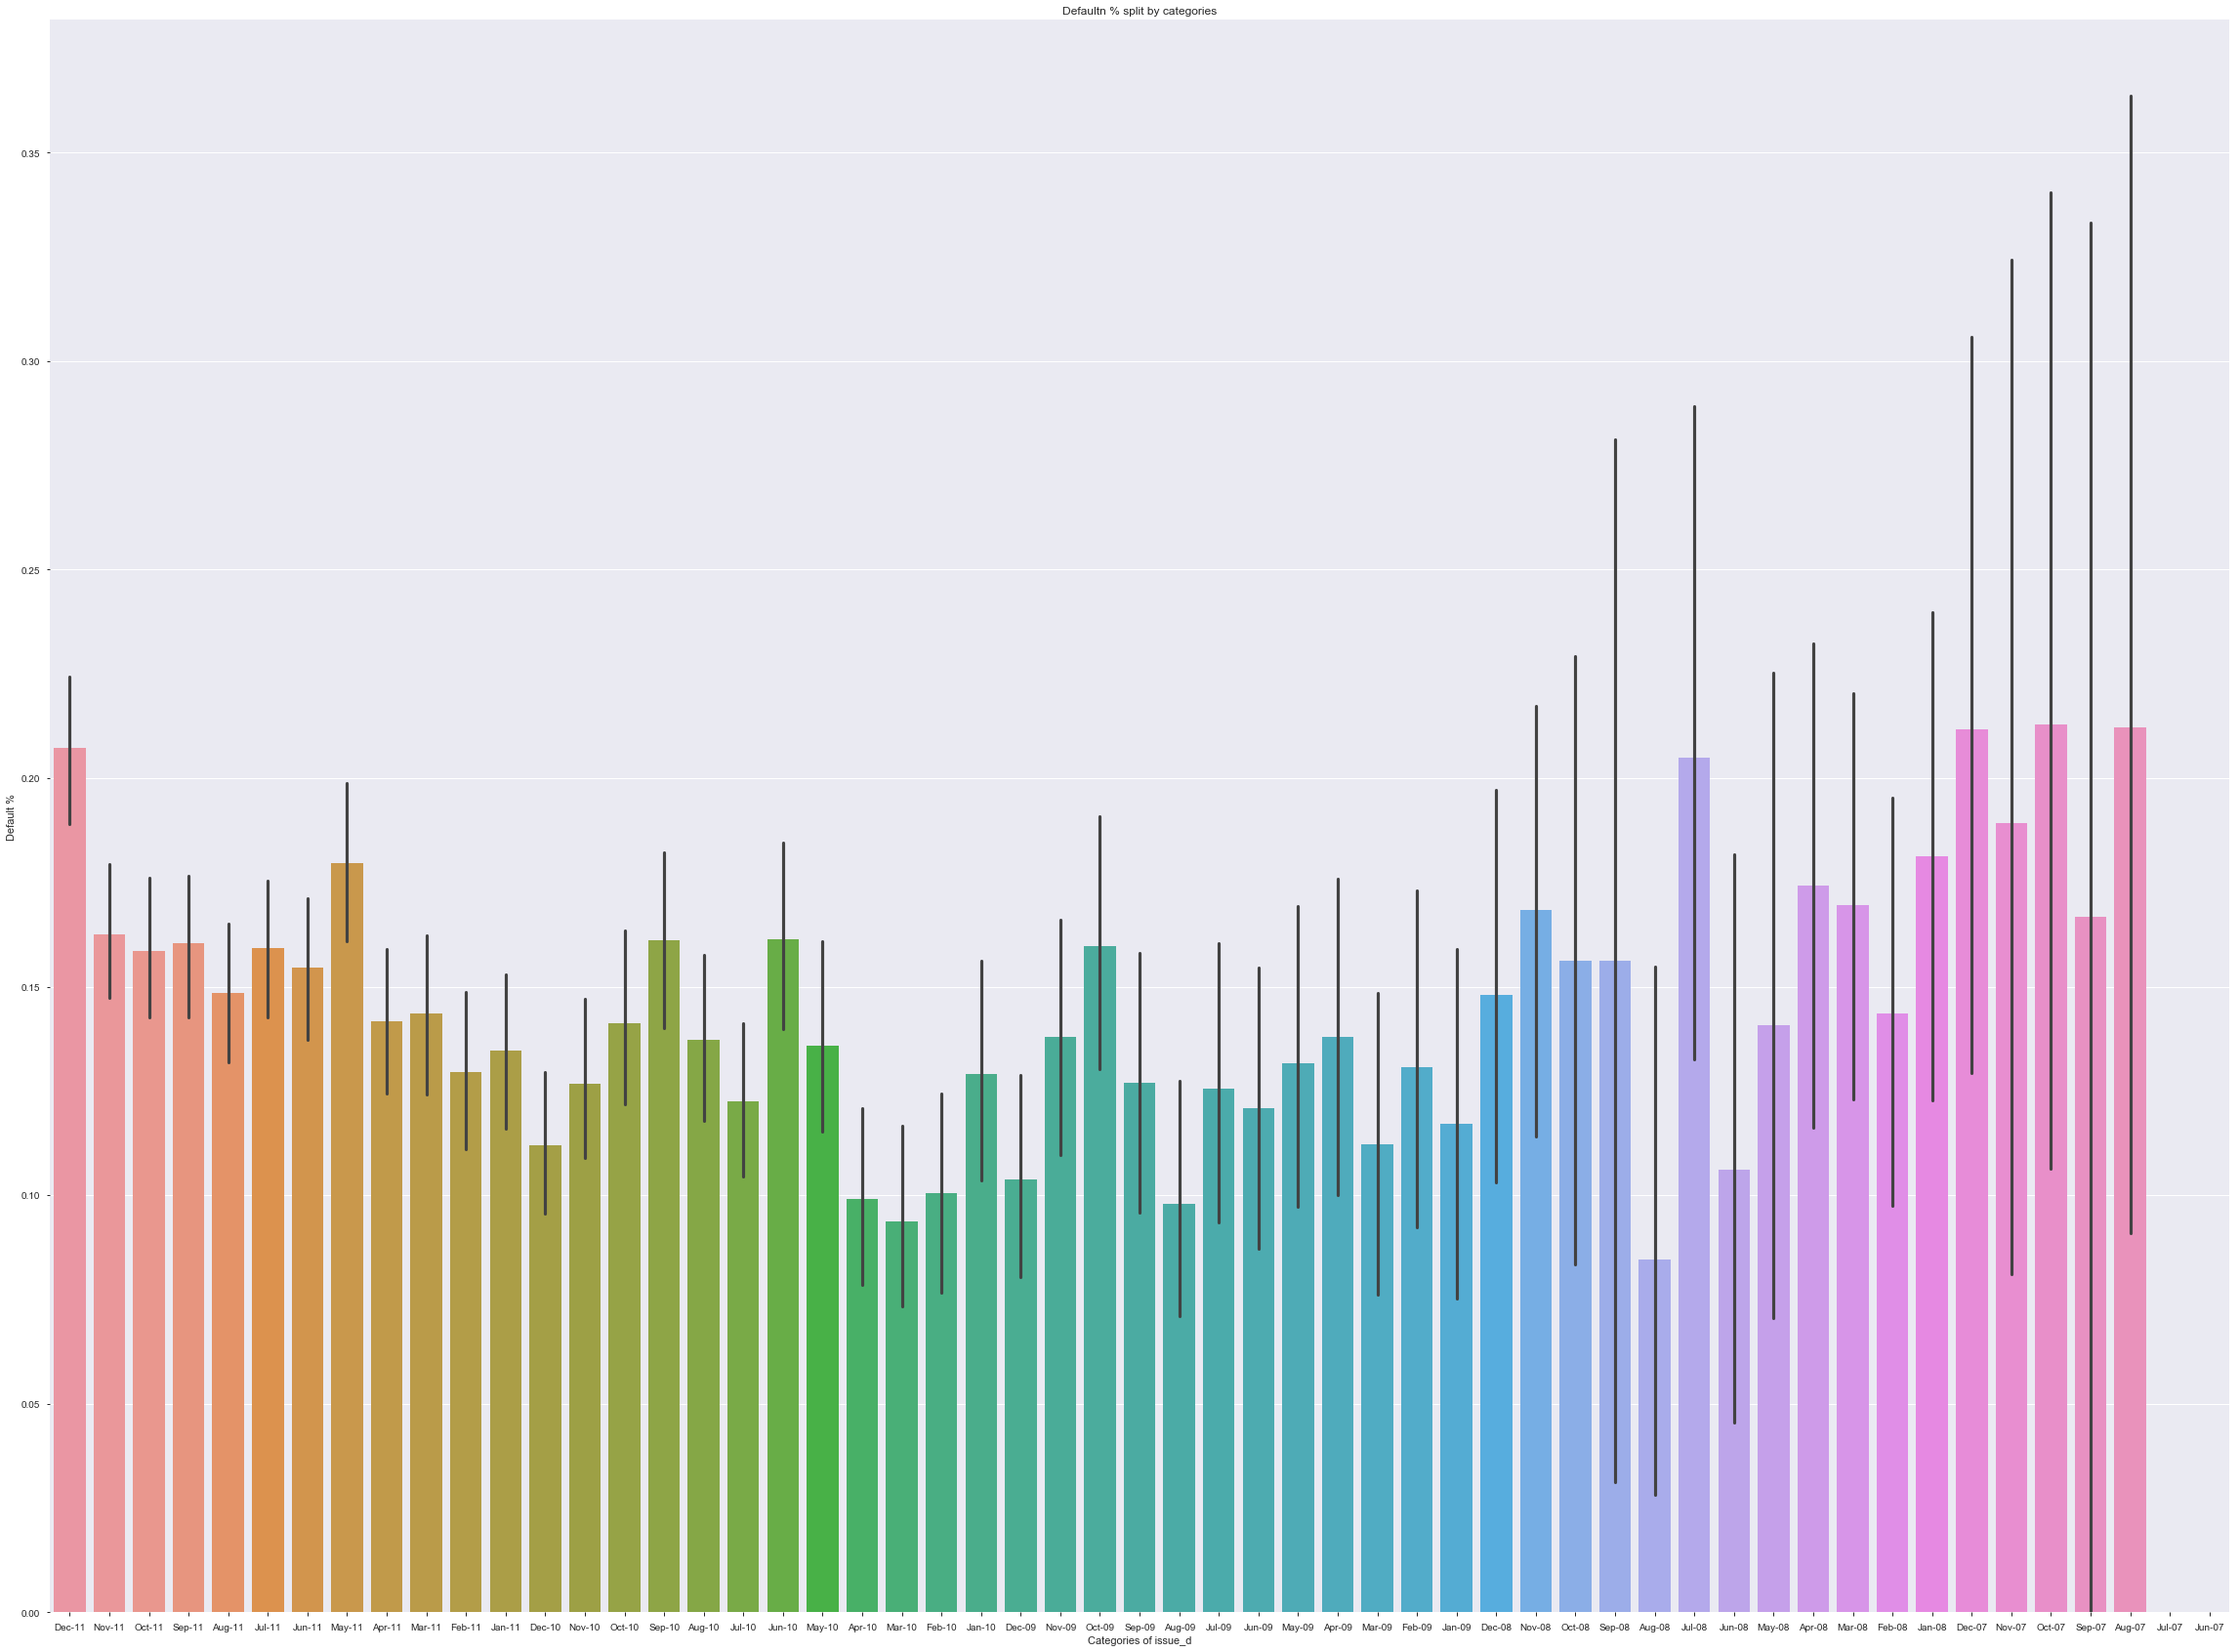

In [157]:
bp = PdfPages('Bivariate analysis of Dates.pdf')
for cat_variable in ['last_pymnt_d',  'last_credit_pull_d',  'issue_d']:
    fig,axes = plt.subplots(figsize=(40,30))
    sns.barplot(x=cat_variable,y='loan_status_cat',data=loan_work) 
    plt.ylabel('Default %')
    plt.xlabel(str('Categories of ') + str(cat_variable))
    plt.title('Defaultn % split by categories')
    bp.savefig(fig)

bp.close()

    Point Plot -

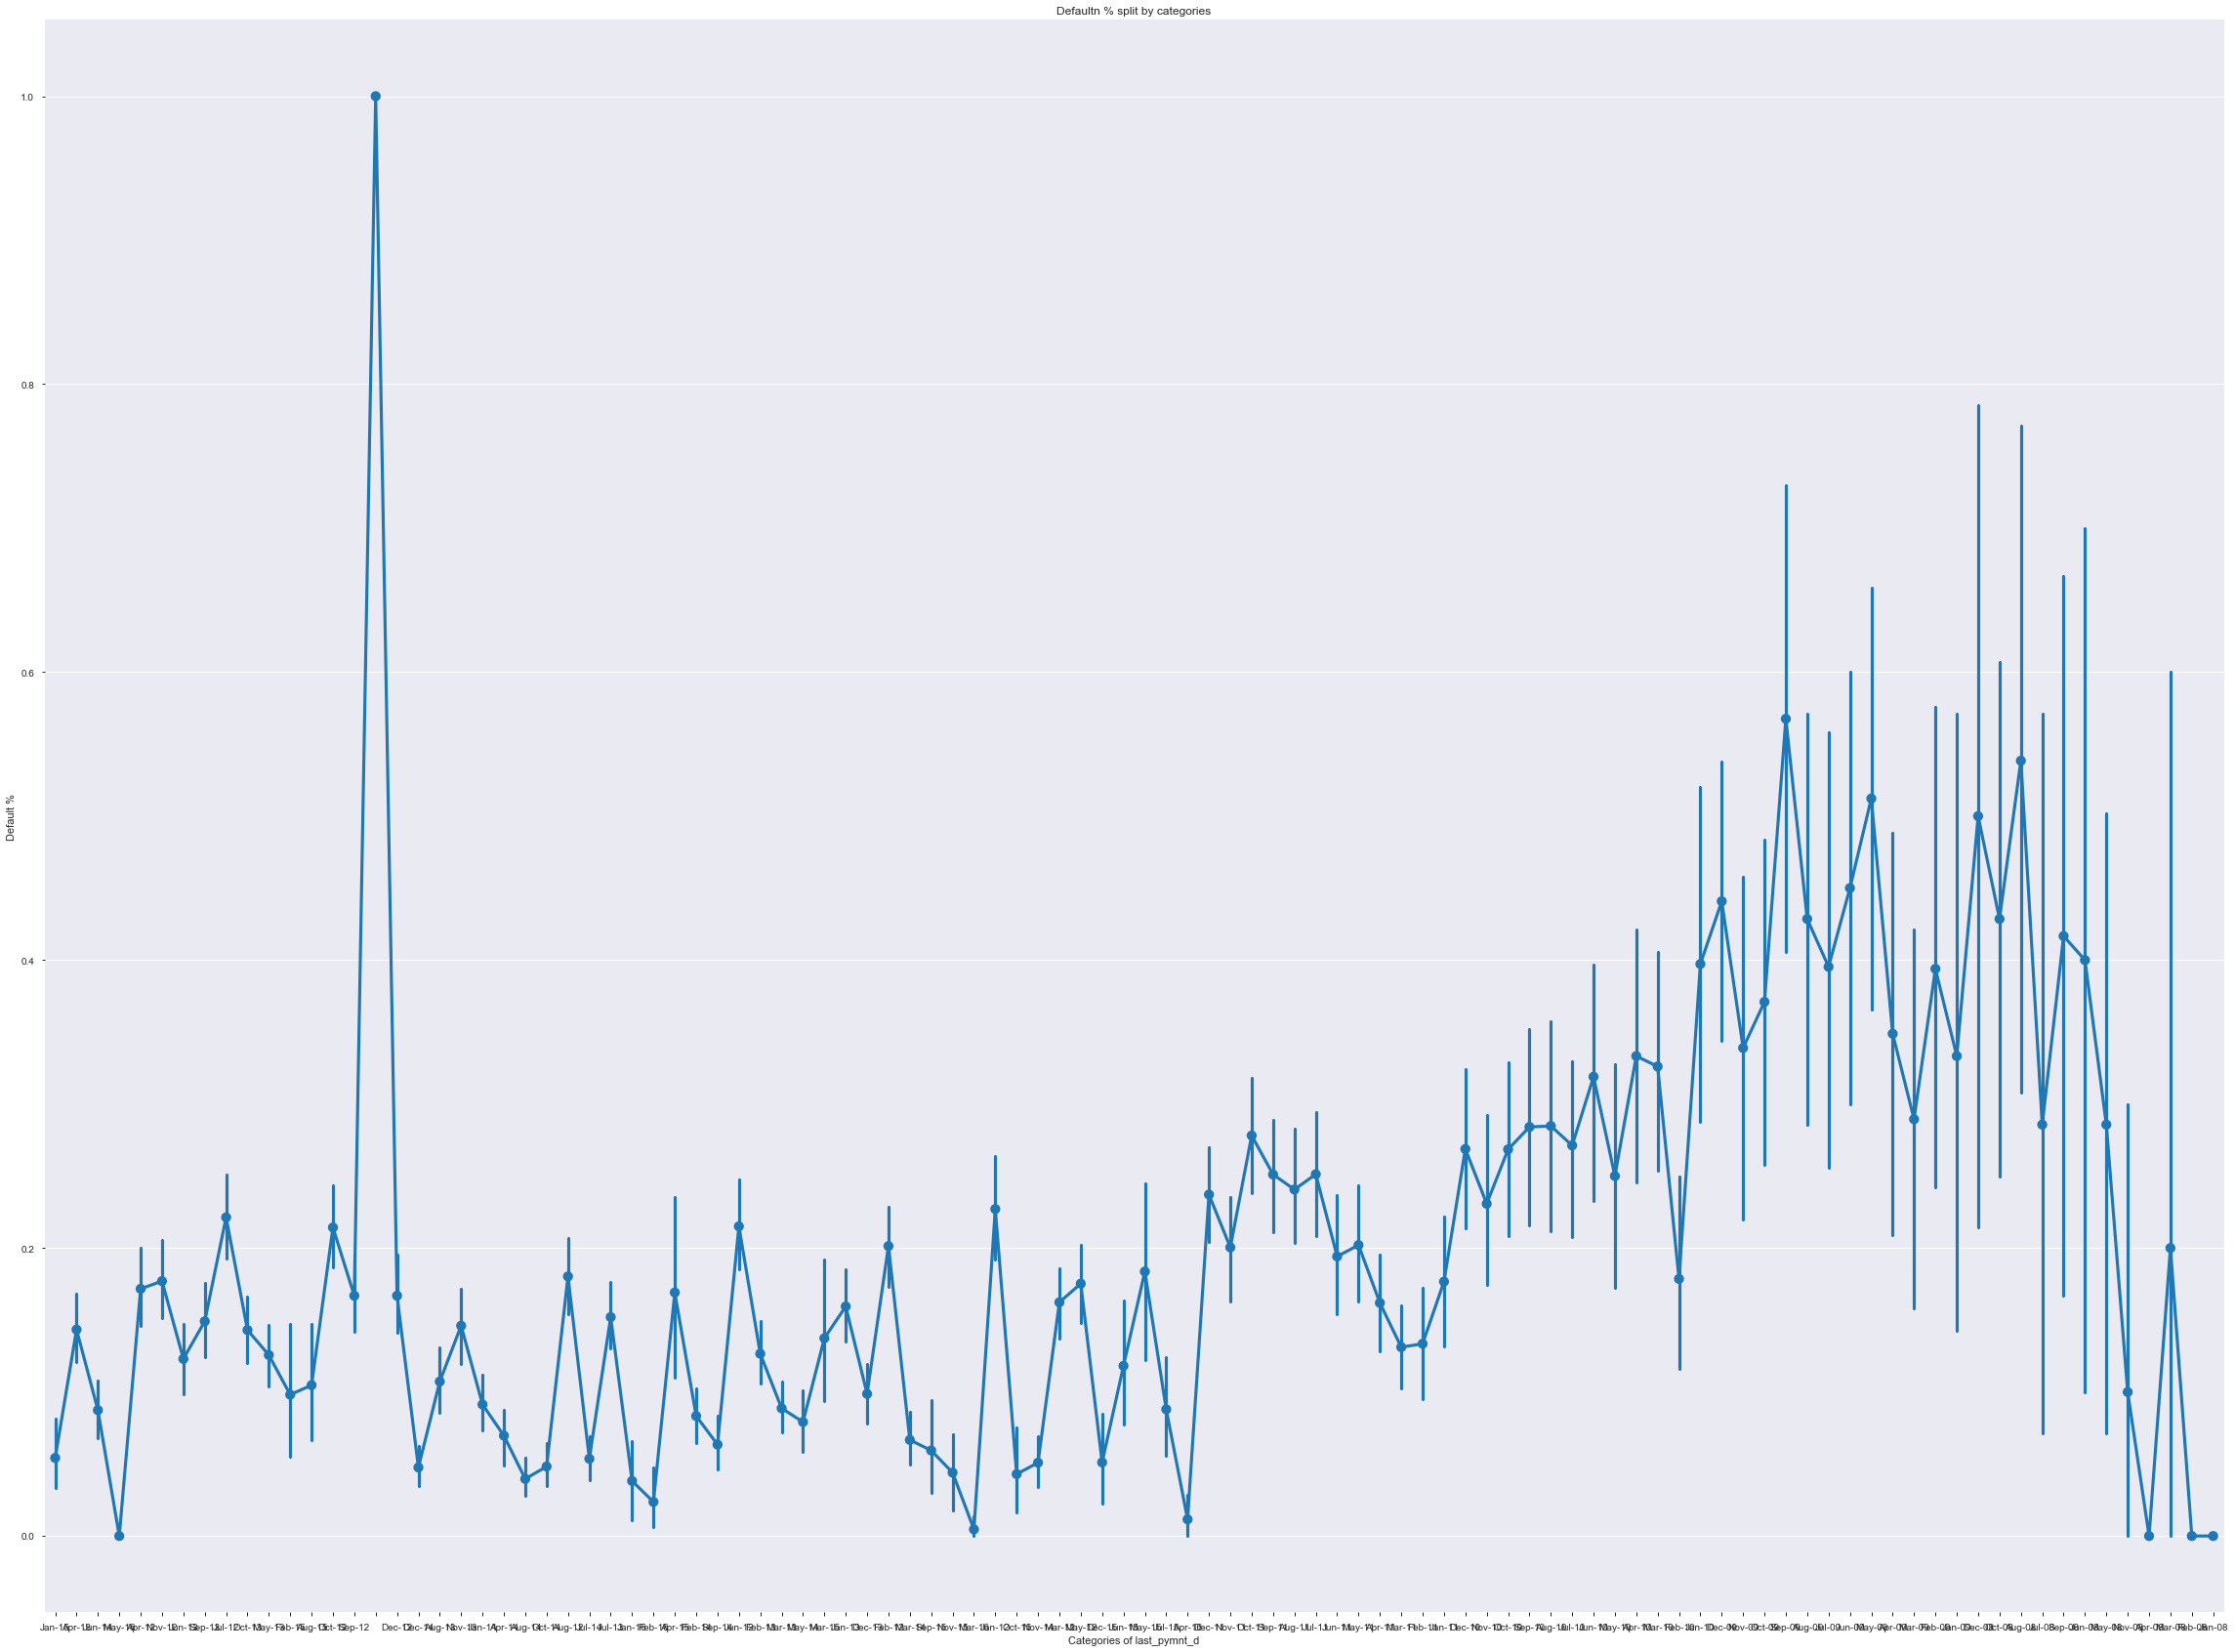

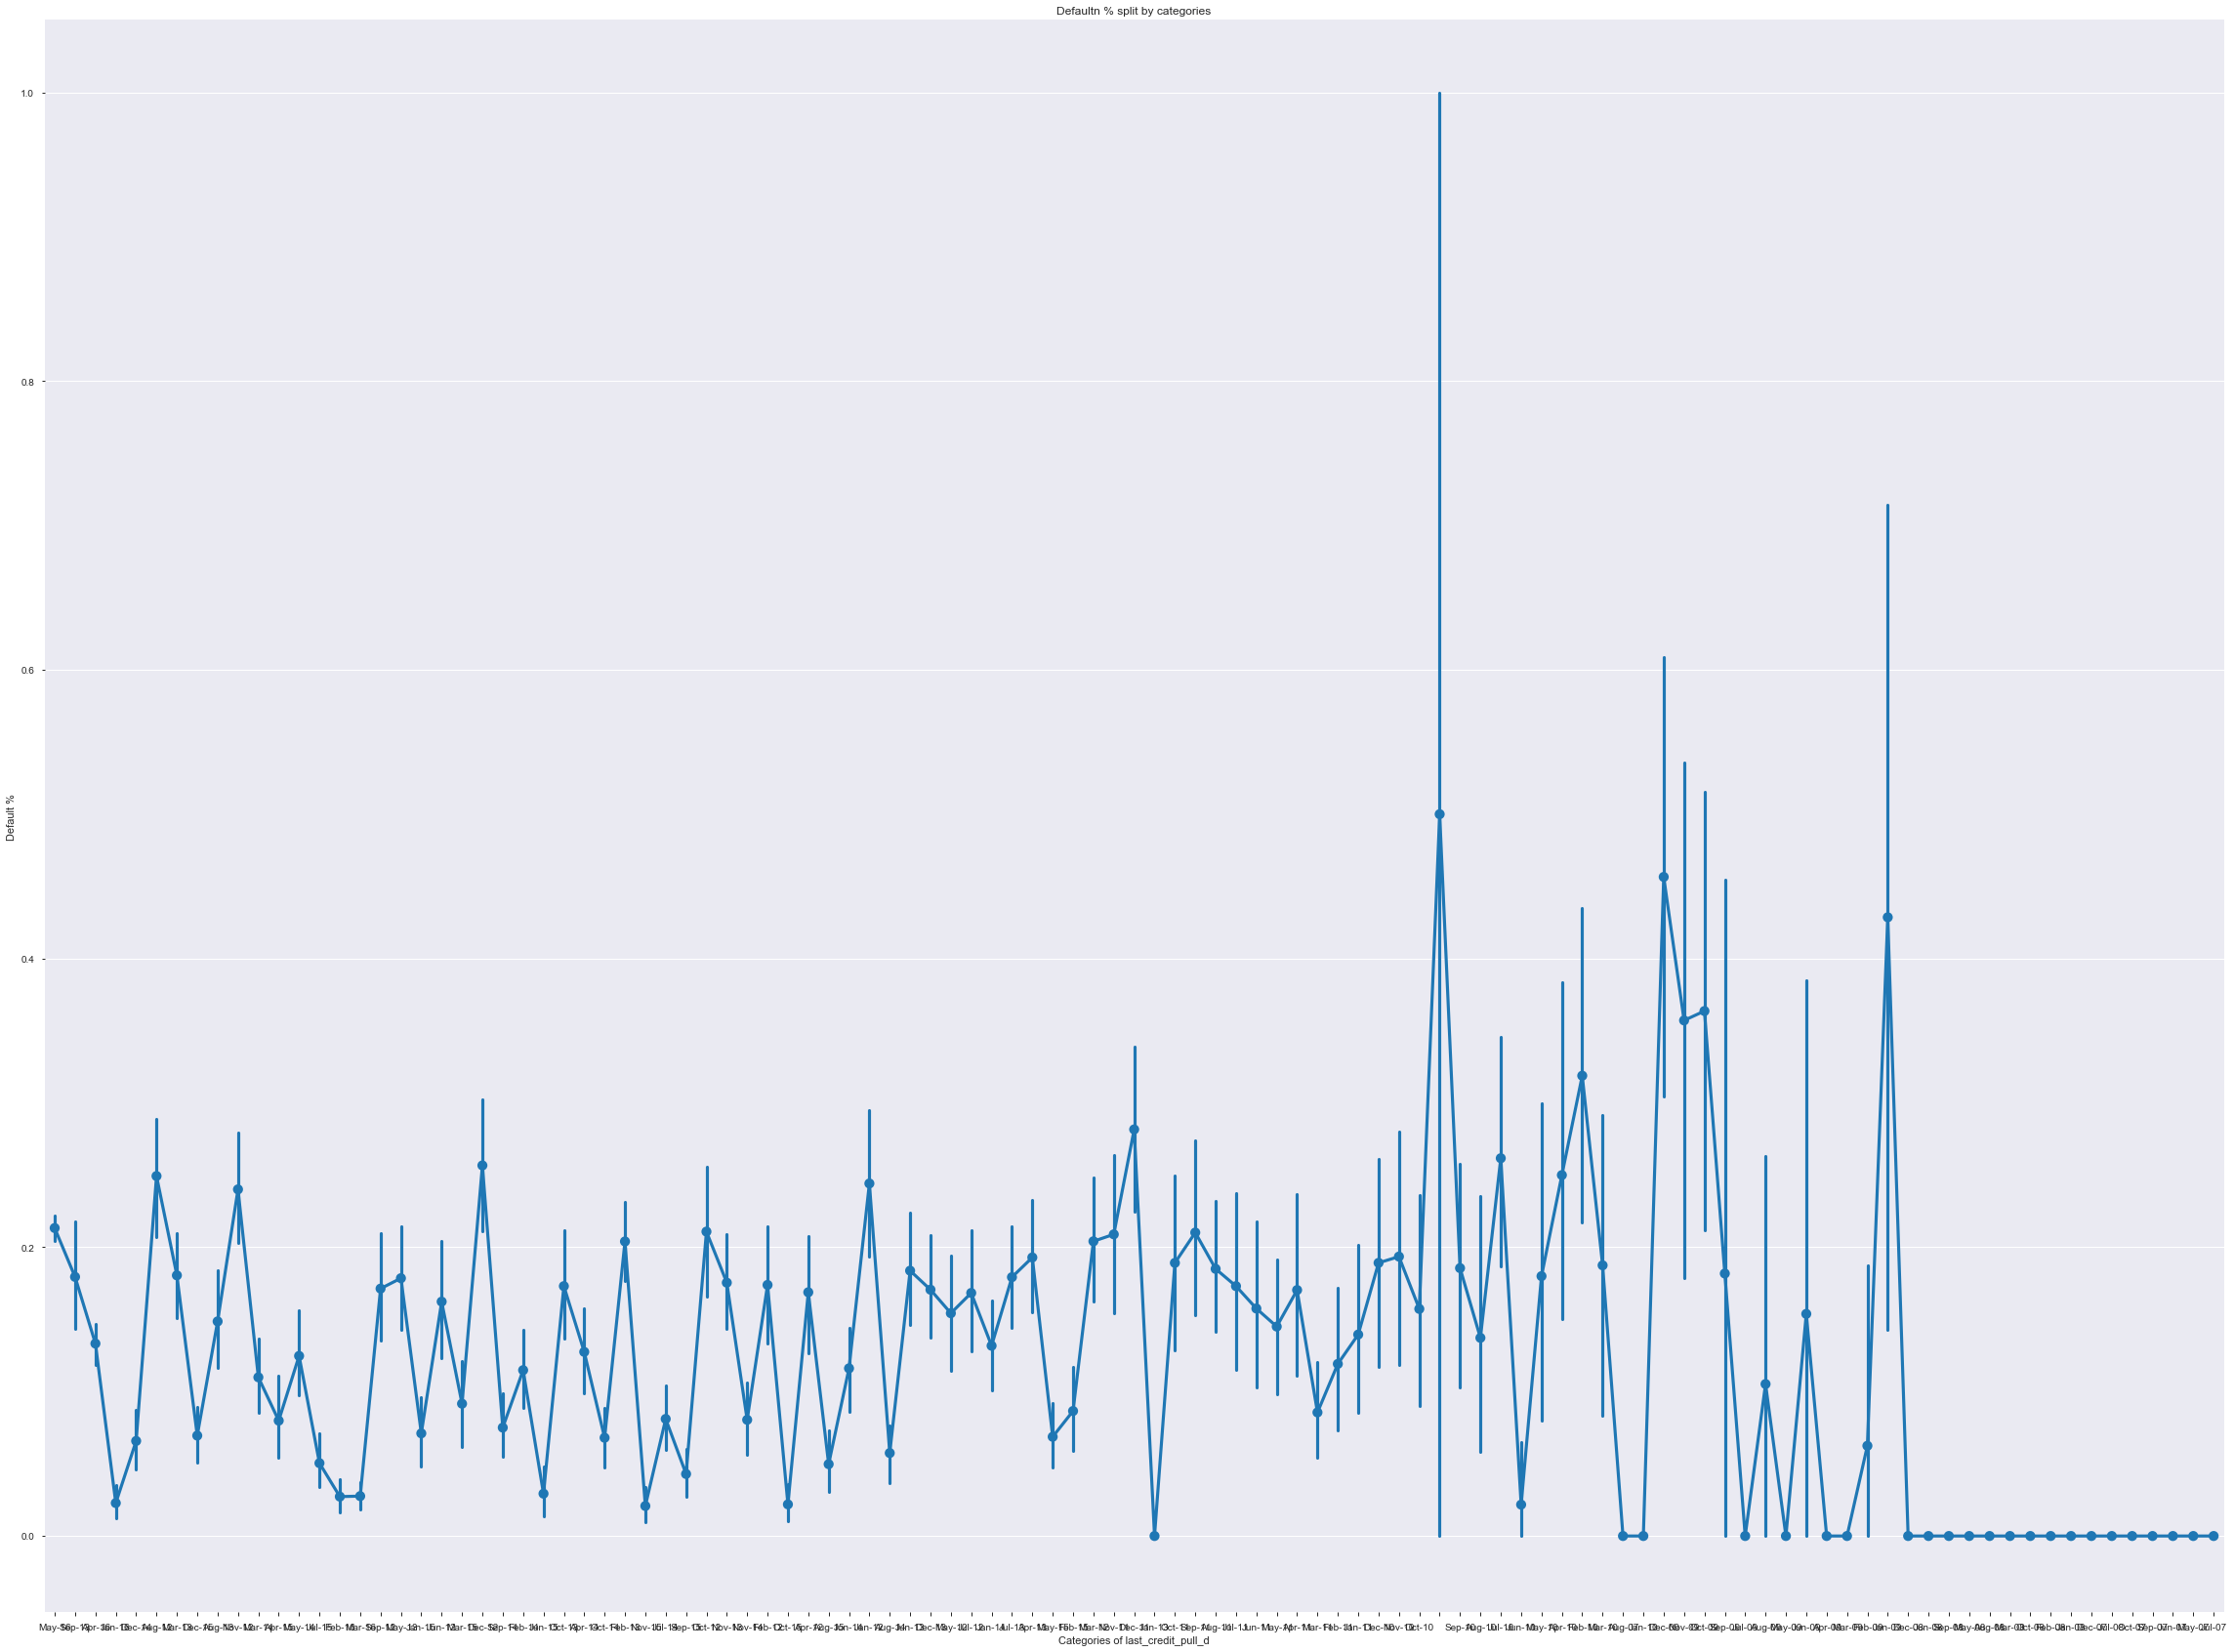

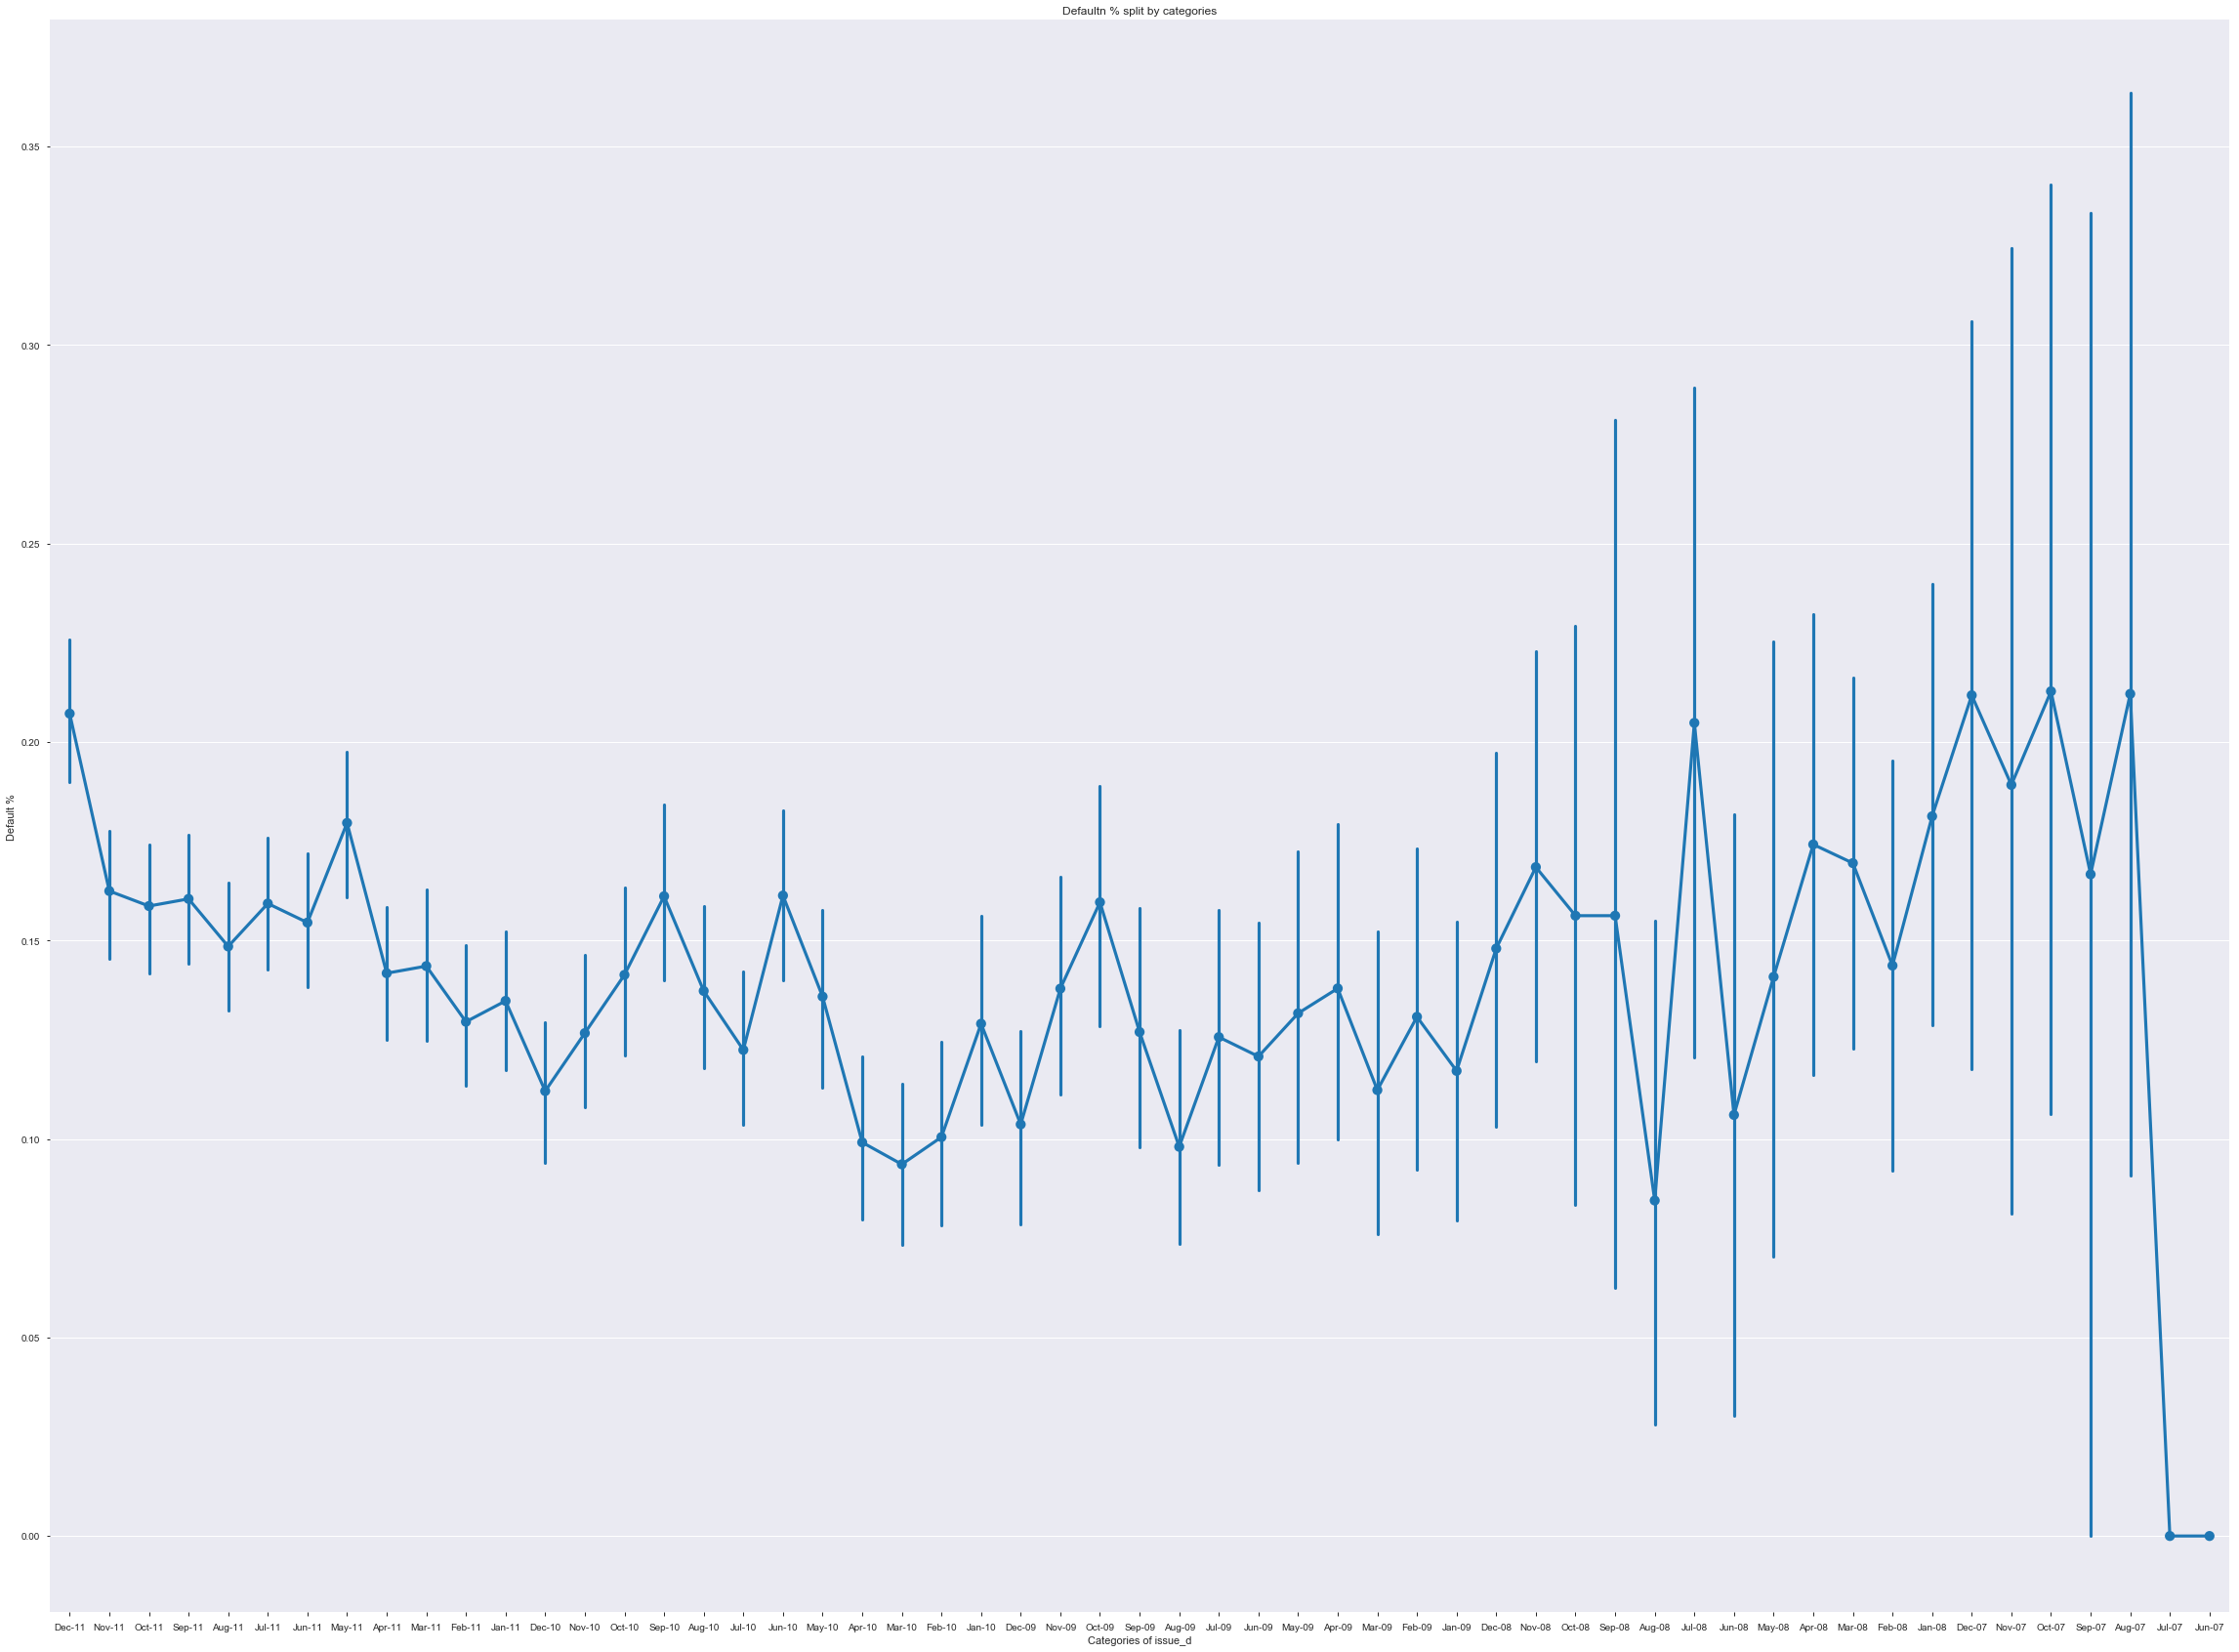

In [158]:
bp = PdfPages('Bivariate analysis of Dates - PointPlot.pdf')
for cat_variable in ['last_pymnt_d',  'last_credit_pull_d',  'issue_d']:
    fig,axes = plt.subplots(figsize=(40,30))
    sns.pointplot(x=cat_variable,y='loan_status_cat',data=loan_work) 
    plt.ylabel('Default %')
    plt.xlabel(str('Categories of ') + str(cat_variable))
    plt.title('Defaultn % split by categories')
    bp.savefig(fig)

bp.close()

## Inference and Recommendations:-

#### Major driving factors (or driver variables) behind loan default can be summarized as:-

	 A> "Higher Interest Rate" is likely to cause higher default rate.
	 B> Customer having "Higher revolving utilization" and "irregular credit payment history" is likely to default. 
	      - Company needs to keep a tab for such customers.

	 C> "Higher inquiry Rates" in last 6 months may be an indication of customer to default a loan.
     
	 D> LC Assigned Loan Grades - G, F and E (in the order) have higher loan charge off rate.
	       - Company needs to look into the loan schemes.
           
	 E>  Customer with Loan Purpose - "Small Business" have high charge off Rate.
           - Company needs to do proper verification of business idea/proposals before giving out such loans.
           
	 F> State NE - Nebraska has significant high default rate.
	       Company needs to investigate the loan branches in the state for probabale causes for 
           such unusually high charge off rate.

    ************************************ End Of Code *************************************************